<div style='font-size:200%;'>
    <a></a>
    <h1 style='color: green; font-weight: bold; font-family: Cascadia code;'>
        <center>Lung cancer prediction using Image-Segmentation, Equalization and Transfer learning</center>
    </h1>
</div>

- - -

<!-- <div style='font-size:200%;'>
    <a id='nan'></a>
    <h1 style='color: chartreuse; font-weight: bold; font-family: Cascadia code;'> Contents </h1>
</div> -->

<!-- - [Importing the necessary libraries ](#import)
- [Data Pre-processing](#preprocess)
- [Exploratory Data Analysis](#eda)
    - [NaN values heat-map](#heatmap)
    - [Typecasting and dropping columns](#typecast)
    - [Correlation between different features and our target variable](#corr)
    - [Distribution of Individuals based on HomePlanet](#planet)
- [Distribution of transported individuals](#trans)
- [Data Pre-processing](#preprocess)
    - [Imputing missing data](#impute)
    - [Typecasting and dropping columns](#typecast)
    - [One-Hot Encoding](#ohe)
    - [Splitting data into x (Values) and y (labels)](#split)
- [Classifying](#classify)
    - [Building and fitting the models](#build)
    - [Performance Analysis of the different models](#anal)
- [Submission](#submit) -->

- - -

## **Abstract:**
 
The second leading cause of death is cancer [9]. From this large domain of cancer, lung cancer is one of the main reasons for death in the world among both men and women, with an impressive rate of about five million deadly cases per year. Every year more than 2,00,000 cases are found in US [11]. Because of high quantity data in CT images and blurred boundaries, tumor segmentation and classification is very hard. In MR images, the amount of data is too much for manual interpretation and analysis. At a very early stage, cancer is not being found because of the small size of the nodules and location of the glands [11]. 
 Machine Learning makes the diagnosis process easier and deterministic. This work has introduced one automatic lung cancer detection method to increase the accuracy and yield and decrease the diagnosis time. The main objective of this work is to detect the cancerous lung nodules from a given input lung image and to predict the lung cancer using Deep Learning technique more efficiently than the existings. 

- - -

<h1 ><a id='contents'><b>Contents<b></a></h1>

- [Importing necessary libraries](#import)
- [Proposed methodology](#methodology)
- [Data Pre-processing](#preprocess)
- [Comparison between processed and unprocessed image](#comparison)
- [Splitting the processed images](#split)
- [Neural nets](#nn)
    - [CNN](#cnn)
    - [VGG16](#vgg16)
    - [VGG19](#vgg19)
    - [MobileNet](#mobilenet)
    - [ResNet50](#resnet50)
    - [Xception](#xception)
    - [InceptionV3](#inceptionv3)
- [Example: Prediction vs Truth](#example)
- [Comparative analysis of the models](#analysis)
- [References](#references)

- - -

<div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Importing the necessary libraries</center>
    </h1>
</div>

In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
from IPython.display import Image
import tensorflow.keras.backend as K
import splitfolders
import pandas as pd
import seaborn as sns

<div style='font-size:100%;'>
    <a id='methodology'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Proposed Methodology</center>
    </h1>
</div>

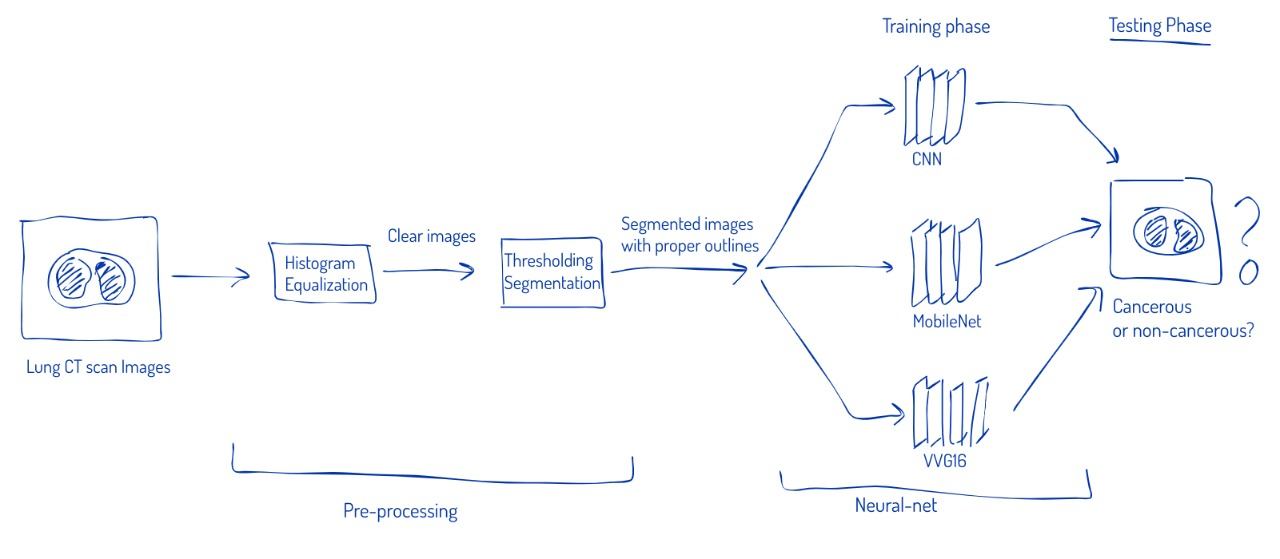

In [ ]:
Image(filename='./methodology.jpeg') 

<div style='font-size:100%;'>
    <a id='preprocess'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Data Pre-processing</center>
    </h1>
</div>

## **Histogram Equalization**

Histogram Equalization is a computer image processing technique used to improve contrast in images. It accomplishes this by effectively spreading out the most frequent intensity values, i.e. stretching out the intensity range of the image. This method usually increases the global contrast of images when its usable data is represented by close contrast values. This allows for areas of lower local contrast to gain a higher contrast.

## **Threshold Segmentation**

Thresholding is a type of image segmentation, where we change the pixels of an image to make the image easier to analyze. In thresholding, we convert an image from colour or grayscale into a binary image, i.e., one that is simply black and white. Most frequently, we use thresholding as a way to select areas of interest of an image, while ignoring the parts we are not concerned with.

#### ***We will preprocess our raw data by histogram equalization and then segment it using thresholding***

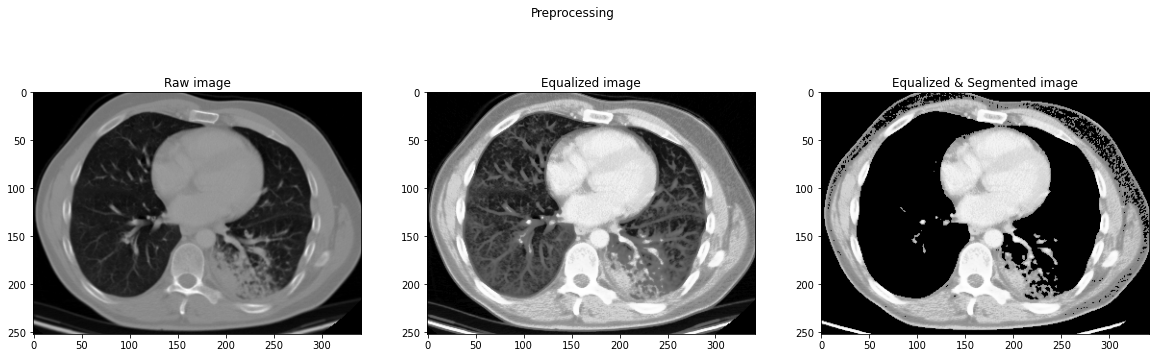

In [ ]:
img = cv2.imread('./rawData/squamous.cell.carcinoma/image1.png', 0)
equalizedImage = cv2.equalizeHist(img)
e, segmentedImage = cv2.threshold(equalizedImage, 128, 255, cv2.THRESH_TOZERO)

plt.figure(figsize=(20, 6))

ax1 = plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Raw image')

ax2 = plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(equalizedImage, cv2.COLOR_BGR2RGB))
ax2.set_title('Equalized image')

ax3 = plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(segmentedImage, cv2.COLOR_BGR2RGB))
ax3.set_title('Equalized & Segmented image')

plt.suptitle('Preprocessing')

plt.show()

In [ ]:
print(os.getcwd(), os.listdir())
DIR = './rawData'
CATS = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

DEST_DIR = './data'

/content ['.config', 'drive', 'MOBILENET.png', 'data', 'CNN.png', 'processedData', 'rawData', 'VGG16.png', 'sample_data']


In [ ]:
!unzip /content/drive/MyDrive/rawData.zip -d /content

In [ ]:
if not os.path.exists(DEST_DIR):
    !mkdir data && cd data && mkdir cancerous && mkdir non-cancerous

for category in CATS:
    path = os.path.join(DIR, category)
    for image in os.listdir(path):
        curr = os.path.join(path, image)
        img = cv2.imread(curr, 0)
        equalizedImage = cv2.equalizeHist(img)
        e, segmentedImage = cv2.threshold(equalizedImage, 128, 255, cv2.THRESH_TOZERO)
        if category == 'normal':
            imgDest = curr.replace('rawData/normal', 'data/non-cancerous')
            cv2.imwrite(imgDest, segmentedImage)
        else:
            imgDest = curr.replace('rawData/adenocarcinoma', 'data/cancerous')
            imgDest = imgDest.replace('rawData/large.cell.carcinoma', 'data/cancerous')
            imgDest = imgDest.replace('rawData/squamous.cell.carcinoma', 'data/cancerous')
            cv2.imwrite(imgDest, segmentedImage)
print("Processed data directory created successfully at", DEST_DIR)

Processed data directory created successfully at ./data


<div style='font-size:100%;'>
    <a id='comparison'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Comparison between processed and unprocessed image</center>
    </h1>
</div>

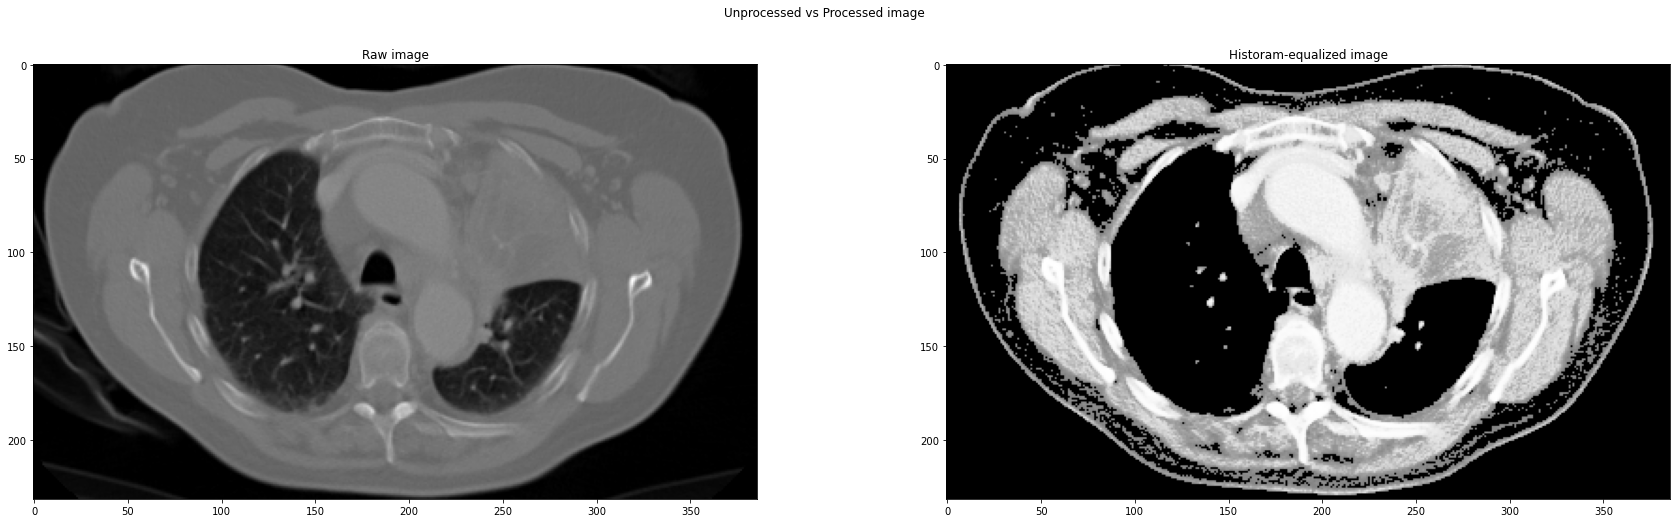

In [ ]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(os.path.join(DIR, CATS[0], 'adenocarcinoma10.png')))
plt.title('Raw image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.imread(os.path.join(DEST_DIR,'cancerous', 'adenocarcinoma10.png')))
plt.title('Historam-equalized image')
plt.suptitle('Unprocessed vs Processed image')
plt.show()

<div style='font-size:100%;'>
    <a id='split'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Splitting the processed images</center>
    </h1>
</div>

In [ ]:
FINAL_DIR = './processedData'

splitfolders.ratio(DEST_DIR, output=FINAL_DIR, seed=69420, ratio=(.7, 0.1,0.2)) 

Copying files: 553 files [00:00, 4781.60 files/s]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
BATCH_SIZE=32


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, validation_split = 0.2,                  
                                                                rotation_range=5,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                fill_mode='nearest'
                                                                )

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [6]:
train_dataset  = train_datagen.flow_from_directory(directory = '/content/drive/MyDrive/processedData/train',
                                                   target_size = (224,224),
                                                   class_mode = 'binary',
                                                   batch_size = 32)

Found 699 images belonging to 2 classes.


In [7]:
valid_dataset = valid_datagen.flow_from_directory(directory = '/content/drive/MyDrive/processedData/val',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 32)

Found 99 images belonging to 2 classes.


In [8]:
test_dataset = test_datagen.flow_from_directory(directory = '/content/drive/MyDrive/processedData/test',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 32)

Found 202 images belonging to 2 classes.


<div style='font-size:100%;'>
    <a id='nn'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Neural nets</center>
    </h1>
</div>

In [9]:
def F1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='Accuracy'),
      tf.keras.metrics.Precision(name='Precision'),
      tf.keras.metrics.Recall(name='Recall'),  
      tf.keras.metrics.AUC(name='AUC'),
      F1,
]

<h1 align="center" ><a id='cnn'><b>CNN<b></a></h1>

In [10]:
CNN = tf.keras.Sequential()
CNN.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
CNN.add(tf.keras.layers.Conv2D(filters=36, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Dropout(rate=0.25))
CNN.add(tf.keras.layers.Flatten())
CNN.add(tf.keras.layers.Dense(units=64, activation='relu'))
CNN.add(tf.keras.layers.Dropout(rate=0.25))
CNN.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

CNN.summary()

CNN.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

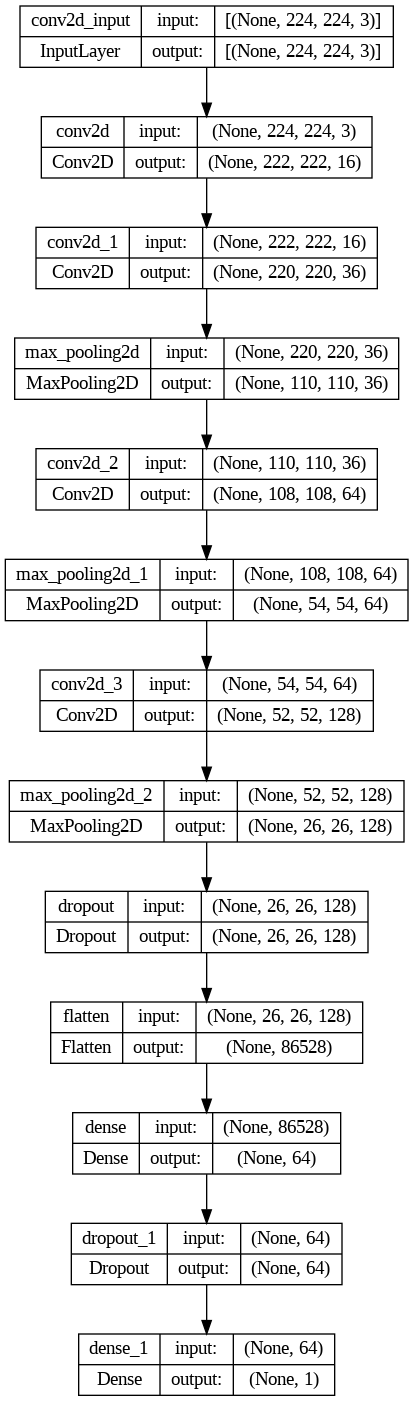

In [11]:
tf.keras.utils.plot_model(CNN, to_file='CNN.png', show_shapes=True,show_layer_names=True)
Image(filename='CNN.png')

In [12]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('CNN.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

CNN.fit(train_dataset,validation_data=valid_dataset, epochs = 36,verbose = 1, callbacks=[lrd,mcp,es], shuffle=True)

Epoch 1/36
22/22 [==============================] - ETA: 0s - loss: 0.7823 - Accuracy: 0.7024 - Precision: 0.1282 - Recall: 0.0667 - AUC: 0.4967 - F1: 0.0391

22/22 [==============================] - 101s 4s/step - loss: 0.7823 - Accuracy: 0.7024 - Precision: 0.1282 - Recall: 0.0667 - AUC: 0.4967 - F1: 0.0391 - val_loss: 0.4998 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.6761 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 2/36
22/22 [==============================] - ETA: 0s - loss: 0.4805 - Accuracy: 0.7854 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - AUC: 0.6886 - F1: 0.0000e+00

22/22 [==============================] - 12s 564ms/step - loss: 0.4805 - Accuracy: 0.7854 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - AUC: 0.6886 - F1: 0.0000e+00 - val_loss: 0.4284 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.8422 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 3/36
22/22 [==============================] - ETA: 0s - loss: 0.4718 - Accuracy: 0.7854 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - AUC: 0.7202 - F1: 0.0000e+00

22/22 [==============================] - 10s 439ms/step - loss: 0.4718 - Accuracy: 0.7854 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - AUC: 0.7202 - F1: 0.0000e+00 - val_loss: 0.3874 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.8816 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 4/36
22/22 [==============================] - ETA: 0s - loss: 0.4465 - Accuracy: 0.7854 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - AUC: 0.7685 - F1: 0.0000e+00

22/22 [==============================] - 11s 489ms/step - loss: 0.4465 - Accuracy: 0.7854 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - AUC: 0.7685 - F1: 0.0000e+00 - val_loss: 0.4142 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.8858 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 5/36
22/22 [==============================] - ETA: 0s - loss: 0.4558 - Accuracy: 0.7854 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - AUC: 0.7437 - F1: 0.0000e+00

22/22 [==============================] - 11s 492ms/step - loss: 0.4558 - Accuracy: 0.7854 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - AUC: 0.7437 - F1: 0.0000e+00 - val_loss: 0.3614 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.8971 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 6/36
22/22 [==============================] - ETA: 0s - loss: 0.4249 - Accuracy: 0.7983 - Precision: 0.9091 - Recall: 0.0667 - AUC: 0.8069 - F1: 0.1137

22/22 [==============================] - 12s 526ms/step - loss: 0.4249 - Accuracy: 0.7983 - Precision: 0.9091 - Recall: 0.0667 - AUC: 0.8069 - F1: 0.1137 - val_loss: 0.3552 - val_Accuracy: 0.8283 - val_Precision: 1.0000 - val_Recall: 0.1905 - val_AUC: 0.8977 - val_F1: 0.3006 - lr: 0.0010
Epoch 7/36
22/22 [==============================] - ETA: 0s - loss: 0.4369 - Accuracy: 0.8026 - Precision: 0.8750 - Recall: 0.0933 - AUC: 0.7822 - F1: 0.1661

22/22 [==============================] - 11s 481ms/step - loss: 0.4369 - Accuracy: 0.8026 - Precision: 0.8750 - Recall: 0.0933 - AUC: 0.7822 - F1: 0.1661 - val_loss: 0.3375 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.9487 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 8/36
22/22 [==============================] - ETA: 0s - loss: 0.4078 - Accuracy: 0.8083 - Precision: 0.9444 - Recall: 0.1133 - AUC: 0.8252 - F1: 0.1790

22/22 [==============================] - 10s 437ms/step - loss: 0.4078 - Accuracy: 0.8083 - Precision: 0.9444 - Recall: 0.1133 - AUC: 0.8252 - F1: 0.1790 - val_loss: 0.3065 - val_Accuracy: 0.8081 - val_Precision: 1.0000 - val_Recall: 0.0952 - val_AUC: 0.9664 - val_F1: 0.1000 - lr: 0.0010
Epoch 9/36
22/22 [==============================] - ETA: 0s - loss: 0.3645 - Accuracy: 0.8255 - Precision: 0.8889 - Recall: 0.2133 - AUC: 0.8796 - F1: 0.2848

22/22 [==============================] - 14s 623ms/step - loss: 0.3645 - Accuracy: 0.8255 - Precision: 0.8889 - Recall: 0.2133 - AUC: 0.8796 - F1: 0.2848 - val_loss: 0.3299 - val_Accuracy: 0.9192 - val_Precision: 0.9333 - val_Recall: 0.6667 - val_AUC: 0.9548 - val_F1: 0.5825 - lr: 0.0010
Epoch 10/36
22/22 [==============================] - ETA: 0s - loss: 0.3425 - Accuracy: 0.8569 - Precision: 0.8571 - Recall: 0.4000 - AUC: 0.8965 - F1: 0.5034

22/22 [==============================] - 11s 497ms/step - loss: 0.3425 - Accuracy: 0.8569 - Precision: 0.8571 - Recall: 0.4000 - AUC: 0.8965 - F1: 0.5034 - val_loss: 0.4052 - val_Accuracy: 0.8990 - val_Precision: 0.7391 - val_Recall: 0.8095 - val_AUC: 0.9643 - val_F1: 0.8172 - lr: 0.0010
Epoch 11/36
22/22 [==============================] - ETA: 0s - loss: 0.3180 - Accuracy: 0.8641 - Precision: 0.9231 - Recall: 0.4000 - AUC: 0.9263 - F1: 0.5234

22/22 [==============================] - 11s 491ms/step - loss: 0.3180 - Accuracy: 0.8641 - Precision: 0.9231 - Recall: 0.4000 - AUC: 0.9263 - F1: 0.5234 - val_loss: 0.2607 - val_Accuracy: 0.9192 - val_Precision: 0.9333 - val_Recall: 0.6667 - val_AUC: 0.9887 - val_F1: 0.5571 - lr: 0.0010
Epoch 12/36
22/22 [==============================] - ETA: 0s - loss: 0.3173 - Accuracy: 0.8741 - Precision: 0.8780 - Recall: 0.4800 - AUC: 0.9208 - F1: 0.5879

22/22 [==============================] - 11s 490ms/step - loss: 0.3173 - Accuracy: 0.8741 - Precision: 0.8780 - Recall: 0.4800 - AUC: 0.9208 - F1: 0.5879 - val_loss: 0.2532 - val_Accuracy: 0.8990 - val_Precision: 1.0000 - val_Recall: 0.5238 - val_AUC: 0.9771 - val_F1: 0.7389 - lr: 0.0010
Epoch 13/36
22/22 [==============================] - ETA: 0s - loss: 0.3137 - Accuracy: 0.8612 - Precision: 0.8354 - Recall: 0.4400 - AUC: 0.9234 - F1: 0.5500

22/22 [==============================] - 10s 445ms/step - loss: 0.3137 - Accuracy: 0.8612 - Precision: 0.8354 - Recall: 0.4400 - AUC: 0.9234 - F1: 0.5500 - val_loss: 0.2210 - val_Accuracy: 0.9293 - val_Precision: 1.0000 - val_Recall: 0.6667 - val_AUC: 0.9847 - val_F1: 0.8229 - lr: 0.0010
Epoch 14/36
22/22 [==============================] - ETA: 0s - loss: 0.2926 - Accuracy: 0.8755 - Precision: 0.8000 - Recall: 0.5600 - AUC: 0.9327 - F1: 0.6459

22/22 [==============================] - 11s 475ms/step - loss: 0.2926 - Accuracy: 0.8755 - Precision: 0.8000 - Recall: 0.5600 - AUC: 0.9327 - F1: 0.6459 - val_loss: 0.2386 - val_Accuracy: 0.9596 - val_Precision: 0.8696 - val_Recall: 0.9524 - val_AUC: 0.9835 - val_F1: 0.9413 - lr: 0.0010
Epoch 15/36
22/22 [==============================] - ETA: 0s - loss: 0.2890 - Accuracy: 0.8770 - Precision: 0.8137 - Recall: 0.5533 - AUC: 0.9381 - F1: 0.6262

22/22 [==============================] - 11s 497ms/step - loss: 0.2890 - Accuracy: 0.8770 - Precision: 0.8137 - Recall: 0.5533 - AUC: 0.9381 - F1: 0.6262 - val_loss: 0.2755 - val_Accuracy: 0.9293 - val_Precision: 0.7500 - val_Recall: 1.0000 - val_AUC: 0.9808 - val_F1: 0.6472 - lr: 0.0010
Epoch 16/36
22/22 [==============================] - ETA: 0s - loss: 0.2664 - Accuracy: 0.8856 - Precision: 0.7734 - Recall: 0.6600 - AUC: 0.9349 - F1: 0.6977
Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


22/22 [==============================] - 11s 495ms/step - loss: 0.2664 - Accuracy: 0.8856 - Precision: 0.7734 - Recall: 0.6600 - AUC: 0.9349 - F1: 0.6977 - val_loss: 0.2764 - val_Accuracy: 0.8384 - val_Precision: 0.5676 - val_Recall: 1.0000 - val_AUC: 0.9753 - val_F1: 0.7653 - lr: 0.0010
Epoch 16: early stopping


In [13]:
CNN_scores = CNN.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 58s 10s/step - loss: 0.2262 - Accuracy: 0.9059 - Precision: 0.6984 - Recall: 1.0000 - AUC: 0.9862 - F1: 0.8003


<h1 align="center" ><a id='vgg16'><b>VGG16<b></a></h1>

In [14]:
VGG16_base = tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in VGG16_base.layers:
    layer.trainable = False

VGG16=tf.keras.Sequential()
VGG16.add(VGG16_base)
VGG16.add(tf.keras.layers.Dropout(0.5))
VGG16.add(tf.keras.layers.Flatten())
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Activation('relu'))
VGG16.add(tf.keras.layers.Dropout(0.5))
VGG16.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Activation('relu'))
VGG16.add(tf.keras.layers.Dropout(0.5))
VGG16.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Activation('relu'))
VGG16.add(tf.keras.layers.Dense(1,activation='sigmoid'))

VGG16.summary()

VGG16.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 512)         0         
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 batch_normalization (BatchN  (None, 25088)            100352    
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 32)                802848    
                                                                 
 batch_normalization_1 (Batc  (None, 32)               

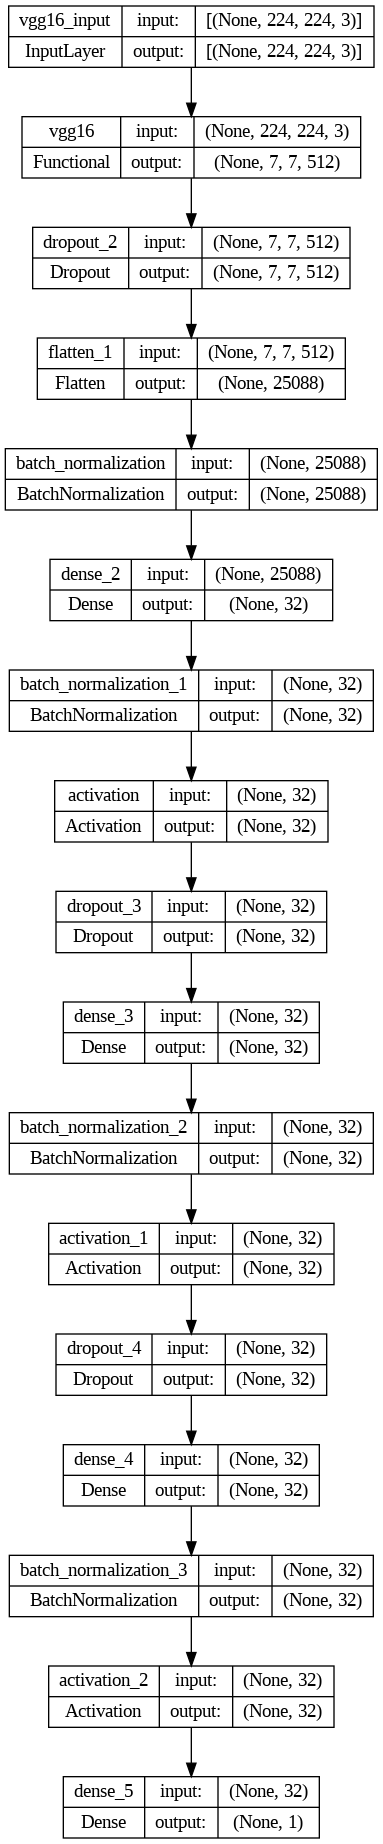

In [15]:
tf.keras.utils.plot_model(VGG16, to_file='VGG16.png', show_shapes=True,show_layer_names=True)
Image(filename='VGG16.png')

In [16]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('VGG16.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

VGG16.fit(train_dataset,validation_data=valid_dataset, epochs = 36,verbose = 1, callbacks=[lrd,mcp,es], shuffle=True)

Epoch 1/36
22/22 [==============================] - ETA: 0s - loss: 0.5492 - Accuracy: 0.7780 - Precision: 0.4842 - Recall: 0.4742 - AUC: 0.7662 - F1: 0.3464

22/22 [==============================] - 26s 838ms/step - loss: 0.5492 - Accuracy: 0.7780 - Precision: 0.4842 - Recall: 0.4742 - AUC: 0.7662 - F1: 0.3464 - val_loss: 0.4439 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.8175 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 2/36
22/22 [==============================] - ETA: 0s - loss: 0.4697 - Accuracy: 0.8126 - Precision: 0.5922 - Recall: 0.4067 - AUC: 0.7506 - F1: 0.4784

22/22 [==============================] - 12s 528ms/step - loss: 0.4697 - Accuracy: 0.8126 - Precision: 0.5922 - Recall: 0.4067 - AUC: 0.7506 - F1: 0.4784 - val_loss: 0.3843 - val_Accuracy: 0.8283 - val_Precision: 1.0000 - val_Recall: 0.1905 - val_AUC: 0.9573 - val_F1: 0.2125 - lr: 0.0010
Epoch 3/36
22/22 [==============================] - ETA: 0s - loss: 0.3882 - Accuracy: 0.8498 - Precision: 0.7586 - Recall: 0.4400 - AUC: 0.8644 - F1: 0.5490

22/22 [==============================] - 11s 485ms/step - loss: 0.3882 - Accuracy: 0.8498 - Precision: 0.7586 - Recall: 0.4400 - AUC: 0.8644 - F1: 0.5490 - val_loss: 0.3332 - val_Accuracy: 0.8889 - val_Precision: 1.0000 - val_Recall: 0.4762 - val_AUC: 0.9567 - val_F1: 0.5000 - lr: 0.0010
Epoch 4/36
22/22 [==============================] - ETA: 0s - loss: 0.3708 - Accuracy: 0.8584 - Precision: 0.7931 - Recall: 0.4600 - AUC: 0.8553 - F1: 0.6028

22/22 [==============================] - 12s 547ms/step - loss: 0.3708 - Accuracy: 0.8584 - Precision: 0.7931 - Recall: 0.4600 - AUC: 0.8553 - F1: 0.6028 - val_loss: 0.2830 - val_Accuracy: 0.9192 - val_Precision: 1.0000 - val_Recall: 0.6190 - val_AUC: 0.9737 - val_F1: 0.6140 - lr: 0.0010
Epoch 5/36
22/22 [==============================] - ETA: 0s - loss: 0.3383 - Accuracy: 0.8641 - Precision: 0.8022 - Recall: 0.4867 - AUC: 0.8908 - F1: 0.6079

22/22 [==============================] - 11s 502ms/step - loss: 0.3383 - Accuracy: 0.8641 - Precision: 0.8022 - Recall: 0.4867 - AUC: 0.8908 - F1: 0.6079 - val_loss: 0.2314 - val_Accuracy: 0.9192 - val_Precision: 1.0000 - val_Recall: 0.6190 - val_AUC: 0.9908 - val_F1: 0.8011 - lr: 0.0010
Epoch 6/36
22/22 [==============================] - ETA: 0s - loss: 0.3256 - Accuracy: 0.8712 - Precision: 0.7778 - Recall: 0.5600 - AUC: 0.8923 - F1: 0.6489

22/22 [==============================] - 11s 502ms/step - loss: 0.3256 - Accuracy: 0.8712 - Precision: 0.7778 - Recall: 0.5600 - AUC: 0.8923 - F1: 0.6489 - val_loss: 0.2527 - val_Accuracy: 0.8889 - val_Precision: 1.0000 - val_Recall: 0.4762 - val_AUC: 0.9799 - val_F1: 0.4929 - lr: 0.0010
Epoch 7/36
22/22 [==============================] - ETA: 0s - loss: 0.2947 - Accuracy: 0.8712 - Precision: 0.7830 - Recall: 0.5533 - AUC: 0.9254 - F1: 0.6440

22/22 [==============================] - 12s 538ms/step - loss: 0.2947 - Accuracy: 0.8712 - Precision: 0.7830 - Recall: 0.5533 - AUC: 0.9254 - F1: 0.6440 - val_loss: 0.2118 - val_Accuracy: 0.9394 - val_Precision: 1.0000 - val_Recall: 0.7143 - val_AUC: 0.9756 - val_F1: 0.6247 - lr: 0.0010
Epoch 8/36
22/22 [==============================] - ETA: 0s - loss: 0.2938 - Accuracy: 0.8827 - Precision: 0.7982 - Recall: 0.6067 - AUC: 0.9089 - F1: 0.6784

22/22 [==============================] - 10s 473ms/step - loss: 0.2938 - Accuracy: 0.8827 - Precision: 0.7982 - Recall: 0.6067 - AUC: 0.9089 - F1: 0.6784 - val_loss: 0.1823 - val_Accuracy: 0.9394 - val_Precision: 1.0000 - val_Recall: 0.7143 - val_AUC: 0.9823 - val_F1: 0.8485 - lr: 0.0010
Epoch 9/36
22/22 [==============================] - ETA: 0s - loss: 0.2612 - Accuracy: 0.8941 - Precision: 0.8276 - Recall: 0.6400 - AUC: 0.9374 - F1: 0.7259

22/22 [==============================] - 11s 474ms/step - loss: 0.2612 - Accuracy: 0.8941 - Precision: 0.8276 - Recall: 0.6400 - AUC: 0.9374 - F1: 0.7259 - val_loss: 0.1612 - val_Accuracy: 0.9495 - val_Precision: 1.0000 - val_Recall: 0.7619 - val_AUC: 0.9893 - val_F1: 0.8916 - lr: 0.0010
Epoch 10/36
22/22 [==============================] - ETA: 0s - loss: 0.2248 - Accuracy: 0.9227 - Precision: 0.9138 - Recall: 0.7067 - AUC: 0.9621 - F1: 0.7960

22/22 [==============================] - 18s 834ms/step - loss: 0.2248 - Accuracy: 0.9227 - Precision: 0.9138 - Recall: 0.7067 - AUC: 0.9621 - F1: 0.7960 - val_loss: 0.1492 - val_Accuracy: 0.9394 - val_Precision: 1.0000 - val_Recall: 0.7143 - val_AUC: 0.9939 - val_F1: 0.6187 - lr: 0.0010
Epoch 11/36
22/22 [==============================] - ETA: 0s - loss: 0.2418 - Accuracy: 0.9070 - Precision: 0.8571 - Recall: 0.6800 - AUC: 0.9457 - F1: 0.7562

22/22 [==============================] - 13s 533ms/step - loss: 0.2418 - Accuracy: 0.9070 - Precision: 0.8571 - Recall: 0.6800 - AUC: 0.9457 - F1: 0.7562 - val_loss: 0.1145 - val_Accuracy: 0.9697 - val_Precision: 1.0000 - val_Recall: 0.8571 - val_AUC: 0.9960 - val_F1: 0.6829 - lr: 0.0010
Epoch 12/36
22/22 [==============================] - ETA: 0s - loss: 0.2244 - Accuracy: 0.9199 - Precision: 0.8561 - Recall: 0.7533 - AUC: 0.9546 - F1: 0.7957

22/22 [==============================] - 12s 527ms/step - loss: 0.2244 - Accuracy: 0.9199 - Precision: 0.8561 - Recall: 0.7533 - AUC: 0.9546 - F1: 0.7957 - val_loss: 0.1170 - val_Accuracy: 0.9697 - val_Precision: 1.0000 - val_Recall: 0.8571 - val_AUC: 0.9969 - val_F1: 0.9500 - lr: 0.0010
Epoch 13/36
22/22 [==============================] - ETA: 0s - loss: 0.2178 - Accuracy: 0.9185 - Precision: 0.8661 - Recall: 0.7333 - AUC: 0.9579 - F1: 0.7903

22/22 [==============================] - 11s 506ms/step - loss: 0.2178 - Accuracy: 0.9185 - Precision: 0.8661 - Recall: 0.7333 - AUC: 0.9579 - F1: 0.7903 - val_loss: 0.1040 - val_Accuracy: 0.9697 - val_Precision: 1.0000 - val_Recall: 0.8571 - val_AUC: 0.9948 - val_F1: 0.9000 - lr: 0.0010
Epoch 14/36
22/22 [==============================] - ETA: 0s - loss: 0.2036 - Accuracy: 0.9242 - Precision: 0.8647 - Recall: 0.7667 - AUC: 0.9620 - F1: 0.7926

22/22 [==============================] - 14s 625ms/step - loss: 0.2036 - Accuracy: 0.9242 - Precision: 0.8647 - Recall: 0.7667 - AUC: 0.9620 - F1: 0.7926 - val_loss: 0.0964 - val_Accuracy: 0.9798 - val_Precision: 1.0000 - val_Recall: 0.9048 - val_AUC: 0.9960 - val_F1: 0.7115 - lr: 0.0010
Epoch 15/36
22/22 [==============================] - ETA: 0s - loss: 0.2151 - Accuracy: 0.9113 - Precision: 0.8438 - Recall: 0.7200 - AUC: 0.9652 - F1: 0.7746

22/22 [==============================] - 11s 489ms/step - loss: 0.2151 - Accuracy: 0.9113 - Precision: 0.8438 - Recall: 0.7200 - AUC: 0.9652 - F1: 0.7746 - val_loss: 0.0883 - val_Accuracy: 0.9798 - val_Precision: 1.0000 - val_Recall: 0.9048 - val_AUC: 0.9948 - val_F1: 0.7188 - lr: 0.0010
Epoch 16/36
22/22 [==============================] - ETA: 0s - loss: 0.2011 - Accuracy: 0.9213 - Precision: 0.8800 - Recall: 0.7333 - AUC: 0.9640 - F1: 0.7994

22/22 [==============================] - 11s 522ms/step - loss: 0.2011 - Accuracy: 0.9213 - Precision: 0.8800 - Recall: 0.7333 - AUC: 0.9640 - F1: 0.7994 - val_loss: 0.0867 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9948 - val_F1: 0.7353 - lr: 0.0010
Epoch 17/36
22/22 [==============================] - ETA: 0s - loss: 0.1775 - Accuracy: 0.9270 - Precision: 0.9024 - Recall: 0.7400 - AUC: 0.9765 - F1: 0.8119

22/22 [==============================] - 15s 684ms/step - loss: 0.1775 - Accuracy: 0.9270 - Precision: 0.9024 - Recall: 0.7400 - AUC: 0.9765 - F1: 0.8119 - val_loss: 0.0781 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9988 - val_F1: 0.7308 - lr: 0.0010
Epoch 18/36
22/22 [==============================] - ETA: 0s - loss: 0.2172 - Accuracy: 0.9099 - Precision: 0.8000 - Recall: 0.7733 - AUC: 0.9572 - F1: 0.7774

22/22 [==============================] - 13s 594ms/step - loss: 0.2172 - Accuracy: 0.9099 - Precision: 0.8000 - Recall: 0.7733 - AUC: 0.9572 - F1: 0.7774 - val_loss: 0.0797 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9982 - val_F1: 0.9773 - lr: 0.0010
Epoch 19/36
22/22 [==============================] - ETA: 0s - loss: 0.1634 - Accuracy: 0.9413 - Precision: 0.8865 - Recall: 0.8333 - AUC: 0.9765 - F1: 0.8577

22/22 [==============================] - 12s 556ms/step - loss: 0.1634 - Accuracy: 0.9413 - Precision: 0.8865 - Recall: 0.8333 - AUC: 0.9765 - F1: 0.8577 - val_loss: 0.0850 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9960 - val_F1: 0.7381 - lr: 0.0010
Epoch 20/36
22/22 [==============================] - ETA: 0s - loss: 0.1408 - Accuracy: 0.9456 - Precision: 0.9000 - Recall: 0.8400 - AUC: 0.9829 - F1: 0.8599
Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


22/22 [==============================] - 13s 598ms/step - loss: 0.1408 - Accuracy: 0.9456 - Precision: 0.9000 - Recall: 0.8400 - AUC: 0.9829 - F1: 0.8599 - val_loss: 0.0806 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9957 - val_F1: 0.9853 - lr: 0.0010
Epoch 20: early stopping


In [17]:
VGG16_scores = VGG16.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 3s 437ms/step - loss: 0.0637 - Accuracy: 0.9851 - Precision: 0.9362 - Recall: 1.0000 - AUC: 0.9990 - F1: 0.9701


<h1 align="center" ><a id='mobilenet'><b>MobileNet<b></a></h1>

In [18]:
MOBILENET_base =  tf.keras.applications.MobileNet(input_shape=(224,224,3), include_top= False)

for layer in MOBILENET_base.layers:
    layer.trainable = False

MOBILENET=tf.keras.Sequential()
MOBILENET.add(MOBILENET_base)
MOBILENET.add(tf.keras.layers.Dropout(0.5))
MOBILENET.add(tf.keras.layers.Flatten())
MOBILENET.add(tf.keras.layers.BatchNormalization())
MOBILENET.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
MOBILENET.add(tf.keras.layers.BatchNormalization())
MOBILENET.add(tf.keras.layers.Activation('relu'))
MOBILENET.add(tf.keras.layers.Dropout(0.5))
MOBILENET.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
MOBILENET.add(tf.keras.layers.BatchNormalization())
MOBILENET.add(tf.keras.layers.Activation('relu'))
MOBILENET.add(tf.keras.layers.Dropout(0.5))
MOBILENET.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
MOBILENET.add(tf.keras.layers.BatchNormalization())
MOBILENET.add(tf.keras.layers.Activation('relu'))
MOBILENET.add(tf.keras.layers.Dense(1,activation='sigmoid'))

MOBILENET.summary()

MOBILENET.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

17225924/17225924 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 1024)        0         
                                                                 
 flatten_2 (Flatten)         (None, 50176)             0         
                                                                 
 batch_normalization_4 (Batc  (None, 50176)            200704    
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 32)                1605664   
                                                       

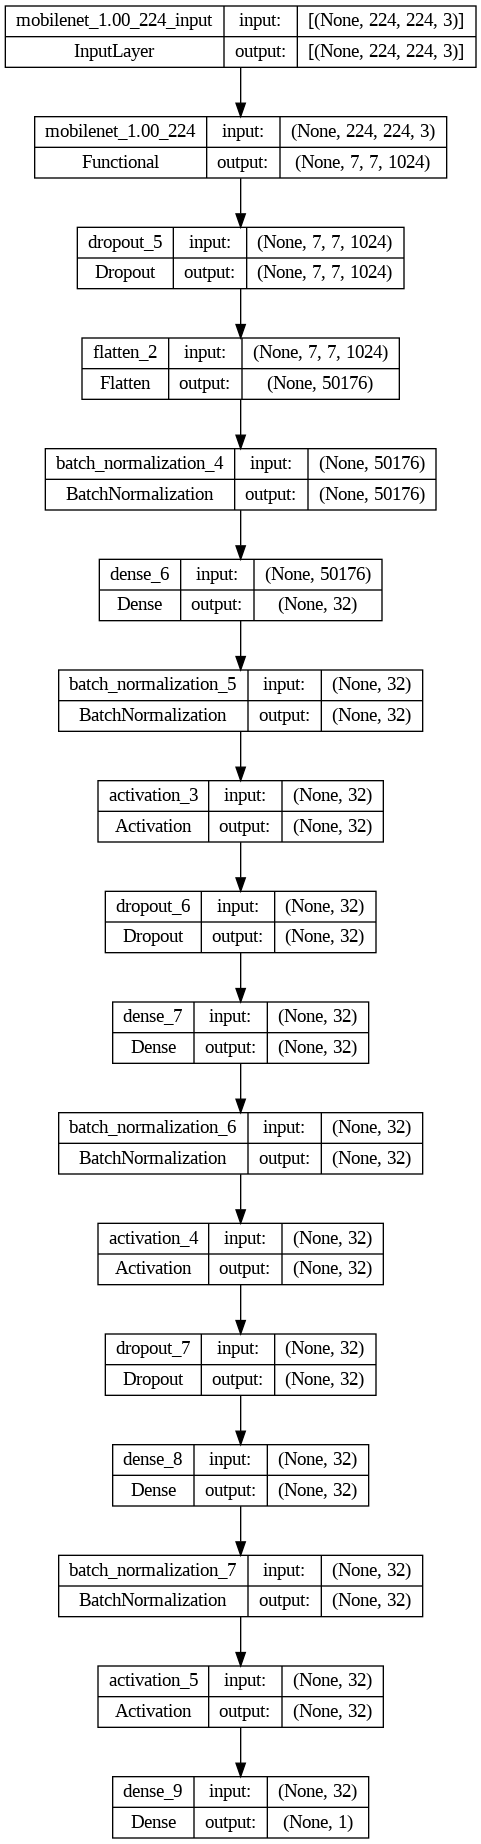

In [19]:
tf.keras.utils.plot_model(MOBILENET, to_file='MOBILENET.png', show_shapes=True,show_layer_names=True)
Image(filename='MOBILENET.png')

In [20]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('MOBILENET.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

MOBILENET.fit(train_dataset,validation_data=valid_dataset,epochs = 36,verbose = 1, callbacks=[lrd, mcp, es], shuffle=True)

Epoch 1/36
22/22 [==============================] - ETA: 0s - loss: 0.6379 - Accuracy: 0.7447 - Precision: 0.4480 - Recall: 0.7990 - AUC: 0.8553 - F1: 0.5041

22/22 [==============================] - 19s 584ms/step - loss: 0.6379 - Accuracy: 0.7447 - Precision: 0.4480 - Recall: 0.7990 - AUC: 0.8553 - F1: 0.5041 - val_loss: 3.0532 - val_Accuracy: 0.2323 - val_Precision: 0.2165 - val_Recall: 1.0000 - val_AUC: 0.8858 - val_F1: 0.3873 - lr: 0.0010
Epoch 2/36
22/22 [==============================] - ETA: 0s - loss: 0.4438 - Accuracy: 0.8612 - Precision: 0.6497 - Recall: 0.7667 - AUC: 0.8968 - F1: 0.7042

22/22 [==============================] - 10s 443ms/step - loss: 0.4438 - Accuracy: 0.8612 - Precision: 0.6497 - Recall: 0.7667 - AUC: 0.8968 - F1: 0.7042 - val_loss: 0.7304 - val_Accuracy: 0.6364 - val_Precision: 0.3684 - val_Recall: 1.0000 - val_AUC: 0.9725 - val_F1: 0.4111 - lr: 0.0010
Epoch 3/36
22/22 [==============================] - ETA: 0s - loss: 0.3380 - Accuracy: 0.9041 - Precision: 0.7578 - Recall: 0.8133 - AUC: 0.9495 - F1: 0.7783

22/22 [==============================] - 10s 460ms/step - loss: 0.3380 - Accuracy: 0.9041 - Precision: 0.7578 - Recall: 0.8133 - AUC: 0.9495 - F1: 0.7783 - val_loss: 0.4671 - val_Accuracy: 0.8182 - val_Precision: 0.5405 - val_Recall: 0.9524 - val_AUC: 0.9649 - val_F1: 0.6835 - lr: 0.0010
Epoch 4/36
22/22 [==============================] - ETA: 0s - loss: 0.2805 - Accuracy: 0.9256 - Precision: 0.8500 - Recall: 0.7933 - AUC: 0.9605 - F1: 0.8141

22/22 [==============================] - 11s 484ms/step - loss: 0.2805 - Accuracy: 0.9256 - Precision: 0.8500 - Recall: 0.7933 - AUC: 0.9605 - F1: 0.8141 - val_loss: 0.2377 - val_Accuracy: 0.9091 - val_Precision: 0.7143 - val_Recall: 0.9524 - val_AUC: 0.9676 - val_F1: 0.8217 - lr: 0.0010
Epoch 5/36
22/22 [==============================] - ETA: 0s - loss: 0.2705 - Accuracy: 0.9213 - Precision: 0.8519 - Recall: 0.7667 - AUC: 0.9449 - F1: 0.7998

22/22 [==============================] - 11s 491ms/step - loss: 0.2705 - Accuracy: 0.9213 - Precision: 0.8519 - Recall: 0.7667 - AUC: 0.9449 - F1: 0.7998 - val_loss: 0.2326 - val_Accuracy: 0.9293 - val_Precision: 0.7692 - val_Recall: 0.9524 - val_AUC: 0.9725 - val_F1: 0.8833 - lr: 0.0010
Epoch 6/36
22/22 [==============================] - ETA: 0s - loss: 0.2339 - Accuracy: 0.9242 - Precision: 0.8489 - Recall: 0.7867 - AUC: 0.9601 - F1: 0.8135

22/22 [==============================] - 9s 429ms/step - loss: 0.2339 - Accuracy: 0.9242 - Precision: 0.8489 - Recall: 0.7867 - AUC: 0.9601 - F1: 0.8135 - val_loss: 0.1735 - val_Accuracy: 0.9596 - val_Precision: 0.8696 - val_Recall: 0.9524 - val_AUC: 0.9756 - val_F1: 0.6776 - lr: 0.0010
Epoch 7/36
22/22 [==============================] - ETA: 0s - loss: 0.1876 - Accuracy: 0.9528 - Precision: 0.9034 - Recall: 0.8733 - AUC: 0.9772 - F1: 0.8860

22/22 [==============================] - 10s 430ms/step - loss: 0.1876 - Accuracy: 0.9528 - Precision: 0.9034 - Recall: 0.8733 - AUC: 0.9772 - F1: 0.8860 - val_loss: 0.1848 - val_Accuracy: 0.9394 - val_Precision: 0.8000 - val_Recall: 0.9524 - val_AUC: 0.9734 - val_F1: 0.6756 - lr: 0.0010
Epoch 8/36
22/22 [==============================] - ETA: 0s - loss: 0.1708 - Accuracy: 0.9557 - Precision: 0.9407 - Recall: 0.8467 - AUC: 0.9847 - F1: 0.8995

22/22 [==============================] - 10s 472ms/step - loss: 0.1708 - Accuracy: 0.9557 - Precision: 0.9407 - Recall: 0.8467 - AUC: 0.9847 - F1: 0.8995 - val_loss: 0.1582 - val_Accuracy: 0.9596 - val_Precision: 0.8696 - val_Recall: 0.9524 - val_AUC: 0.9765 - val_F1: 0.6976 - lr: 0.0010
Epoch 9/36
22/22 [==============================] - ETA: 0s - loss: 0.1725 - Accuracy: 0.9471 - Precision: 0.9313 - Recall: 0.8133 - AUC: 0.9691 - F1: 0.8656

22/22 [==============================] - 10s 475ms/step - loss: 0.1725 - Accuracy: 0.9471 - Precision: 0.9313 - Recall: 0.8133 - AUC: 0.9691 - F1: 0.8656 - val_loss: 0.1147 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9621 - val_F1: 0.9035 - lr: 0.0010
Epoch 10/36
22/22 [==============================] - ETA: 0s - loss: 0.1604 - Accuracy: 0.9542 - Precision: 0.9155 - Recall: 0.8667 - AUC: 0.9785 - F1: 0.8864

22/22 [==============================] - 10s 461ms/step - loss: 0.1604 - Accuracy: 0.9542 - Precision: 0.9155 - Recall: 0.8667 - AUC: 0.9785 - F1: 0.8864 - val_loss: 0.1016 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9771 - val_F1: 0.7161 - lr: 0.0010
Epoch 11/36
22/22 [==============================] - ETA: 0s - loss: 0.1440 - Accuracy: 0.9571 - Precision: 0.9110 - Recall: 0.8867 - AUC: 0.9838 - F1: 0.8827

22/22 [==============================] - 10s 425ms/step - loss: 0.1440 - Accuracy: 0.9571 - Precision: 0.9110 - Recall: 0.8867 - AUC: 0.9838 - F1: 0.8827 - val_loss: 0.1001 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9857 - val_F1: 0.7030 - lr: 0.0010
Epoch 12/36
22/22 [==============================] - ETA: 0s - loss: 0.1460 - Accuracy: 0.9471 - Precision: 0.8897 - Recall: 0.8600 - AUC: 0.9778 - F1: 0.8646

22/22 [==============================] - 11s 480ms/step - loss: 0.1460 - Accuracy: 0.9471 - Precision: 0.8897 - Recall: 0.8600 - AUC: 0.9778 - F1: 0.8646 - val_loss: 0.0993 - val_Accuracy: 0.9697 - val_Precision: 0.9091 - val_Recall: 0.9524 - val_AUC: 0.9829 - val_F1: 0.9353 - lr: 0.0010
Epoch 13/36
22/22 [==============================] - ETA: 0s - loss: 0.1147 - Accuracy: 0.9671 - Precision: 0.9504 - Recall: 0.8933 - AUC: 0.9880 - F1: 0.9168

22/22 [==============================] - 11s 491ms/step - loss: 0.1147 - Accuracy: 0.9671 - Precision: 0.9504 - Recall: 0.8933 - AUC: 0.9880 - F1: 0.9168 - val_loss: 0.0997 - val_Accuracy: 0.9697 - val_Precision: 0.9091 - val_Recall: 0.9524 - val_AUC: 0.9817 - val_F1: 0.9417 - lr: 0.0010
Epoch 14/36
22/22 [==============================] - ETA: 0s - loss: 0.1336 - Accuracy: 0.9542 - Precision: 0.9041 - Recall: 0.8800 - AUC: 0.9867 - F1: 0.8874

22/22 [==============================] - 10s 461ms/step - loss: 0.1336 - Accuracy: 0.9542 - Precision: 0.9041 - Recall: 0.8800 - AUC: 0.9867 - F1: 0.8874 - val_loss: 0.0765 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9795 - val_F1: 0.7115 - lr: 0.0010
Epoch 15/36
22/22 [==============================] - ETA: 0s - loss: 0.1339 - Accuracy: 0.9657 - Precision: 0.9437 - Recall: 0.8933 - AUC: 0.9804 - F1: 0.9128

22/22 [==============================] - 10s 426ms/step - loss: 0.1339 - Accuracy: 0.9657 - Precision: 0.9437 - Recall: 0.8933 - AUC: 0.9804 - F1: 0.9128 - val_loss: 0.0863 - val_Accuracy: 0.9697 - val_Precision: 0.9091 - val_Recall: 0.9524 - val_AUC: 0.9768 - val_F1: 0.6924 - lr: 0.0010
Epoch 16/36
22/22 [==============================] - ETA: 0s - loss: 0.1254 - Accuracy: 0.9585 - Precision: 0.9291 - Recall: 0.8733 - AUC: 0.9854 - F1: 0.8919

22/22 [==============================] - 10s 477ms/step - loss: 0.1254 - Accuracy: 0.9585 - Precision: 0.9291 - Recall: 0.8733 - AUC: 0.9854 - F1: 0.8919 - val_loss: 0.0726 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9658 - val_F1: 0.9833 - lr: 0.0010
Epoch 17/36
22/22 [==============================] - ETA: 0s - loss: 0.0981 - Accuracy: 0.9642 - Precision: 0.9252 - Recall: 0.9067 - AUC: 0.9924 - F1: 0.9130

22/22 [==============================] - 10s 474ms/step - loss: 0.0981 - Accuracy: 0.9642 - Precision: 0.9252 - Recall: 0.9067 - AUC: 0.9924 - F1: 0.9130 - val_loss: 0.0689 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9698 - val_F1: 0.9853 - lr: 0.0010
Epoch 18/36
22/22 [==============================] - ETA: 0s - loss: 0.1046 - Accuracy: 0.9599 - Precision: 0.9236 - Recall: 0.8867 - AUC: 0.9914 - F1: 0.9048

22/22 [==============================] - 10s 459ms/step - loss: 0.1046 - Accuracy: 0.9599 - Precision: 0.9236 - Recall: 0.8867 - AUC: 0.9914 - F1: 0.9048 - val_loss: 0.0677 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9609 - val_F1: 0.7222 - lr: 0.0010
Epoch 19/36
22/22 [==============================] - ETA: 0s - loss: 0.0918 - Accuracy: 0.9714 - Precision: 0.9643 - Recall: 0.9000 - AUC: 0.9872 - F1: 0.9344

22/22 [==============================] - 9s 421ms/step - loss: 0.0918 - Accuracy: 0.9714 - Precision: 0.9643 - Recall: 0.9000 - AUC: 0.9872 - F1: 0.9344 - val_loss: 0.0703 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9799 - val_F1: 0.9580 - lr: 0.0010
Epoch 20/36
22/22 [==============================] - ETA: 0s - loss: 0.1288 - Accuracy: 0.9685 - Precision: 0.9267 - Recall: 0.9267 - AUC: 0.9854 - F1: 0.9056

22/22 [==============================] - 10s 467ms/step - loss: 0.1288 - Accuracy: 0.9685 - Precision: 0.9267 - Recall: 0.9267 - AUC: 0.9854 - F1: 0.9056 - val_loss: 0.0658 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9838 - val_F1: 0.7333 - lr: 0.0010
Epoch 21/36
22/22 [==============================] - ETA: 0s - loss: 0.1082 - Accuracy: 0.9599 - Precision: 0.9178 - Recall: 0.8933 - AUC: 0.9900 - F1: 0.8981

22/22 [==============================] - 11s 478ms/step - loss: 0.1082 - Accuracy: 0.9599 - Precision: 0.9178 - Recall: 0.8933 - AUC: 0.9900 - F1: 0.8981 - val_loss: 0.0801 - val_Accuracy: 0.9697 - val_Precision: 0.9091 - val_Recall: 0.9524 - val_AUC: 0.9667 - val_F1: 0.7105 - lr: 0.0010
Epoch 22/36
22/22 [==============================] - ETA: 0s - loss: 0.0928 - Accuracy: 0.9657 - Precision: 0.9315 - Recall: 0.9067 - AUC: 0.9930 - F1: 0.9094

22/22 [==============================] - 11s 479ms/step - loss: 0.0928 - Accuracy: 0.9657 - Precision: 0.9315 - Recall: 0.9067 - AUC: 0.9930 - F1: 0.9094 - val_loss: 0.0740 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9683 - val_F1: 0.7186 - lr: 0.0010
Epoch 23/36
22/22 [==============================] - ETA: 0s - loss: 0.1097 - Accuracy: 0.9557 - Precision: 0.9103 - Recall: 0.8800 - AUC: 0.9903 - F1: 0.8866
Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


22/22 [==============================] - 10s 451ms/step - loss: 0.1097 - Accuracy: 0.9557 - Precision: 0.9103 - Recall: 0.8800 - AUC: 0.9903 - F1: 0.8866 - val_loss: 0.0729 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9710 - val_F1: 0.7143 - lr: 0.0010
Epoch 23: early stopping


In [21]:
MOBILENET_scores = MOBILENET.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 1s 147ms/step - loss: 0.0209 - Accuracy: 0.9950 - Precision: 0.9778 - Recall: 1.0000 - AUC: 0.9999 - F1: 0.9905


<h1 align="center" ><a id='vgg19'><b>VGG19<b></a></h1>

In [22]:
VGG19_base = tf.keras.applications.VGG19(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in VGG19_base.layers:
    layer.trainable = False

VGG19=tf.keras.Sequential()
VGG19.add(VGG19_base)
VGG19.add(tf.keras.layers.Dropout(0.5))
VGG19.add(tf.keras.layers.Flatten())
VGG19.add(tf.keras.layers.BatchNormalization())
VGG19.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG19.add(tf.keras.layers.BatchNormalization())
VGG19.add(tf.keras.layers.Activation('relu'))
VGG19.add(tf.keras.layers.Dropout(0.5))
VGG19.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG19.add(tf.keras.layers.BatchNormalization())
VGG19.add(tf.keras.layers.Activation('relu'))
VGG19.add(tf.keras.layers.Dropout(0.5))
VGG19.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG19.add(tf.keras.layers.BatchNormalization())
VGG19.add(tf.keras.layers.Activation('relu'))
VGG19.add(tf.keras.layers.Dense(1,activation='sigmoid'))

VGG19.summary()

VGG19.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

80134624/80134624 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 dropout_8 (Dropout)         (None, 7, 7, 512)         0         
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 batch_normalization_8 (Batc  (None, 25088)            100352    
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 32)                802848    
                                                                 
 batch_normalization_9 (Batc  (None, 32)               

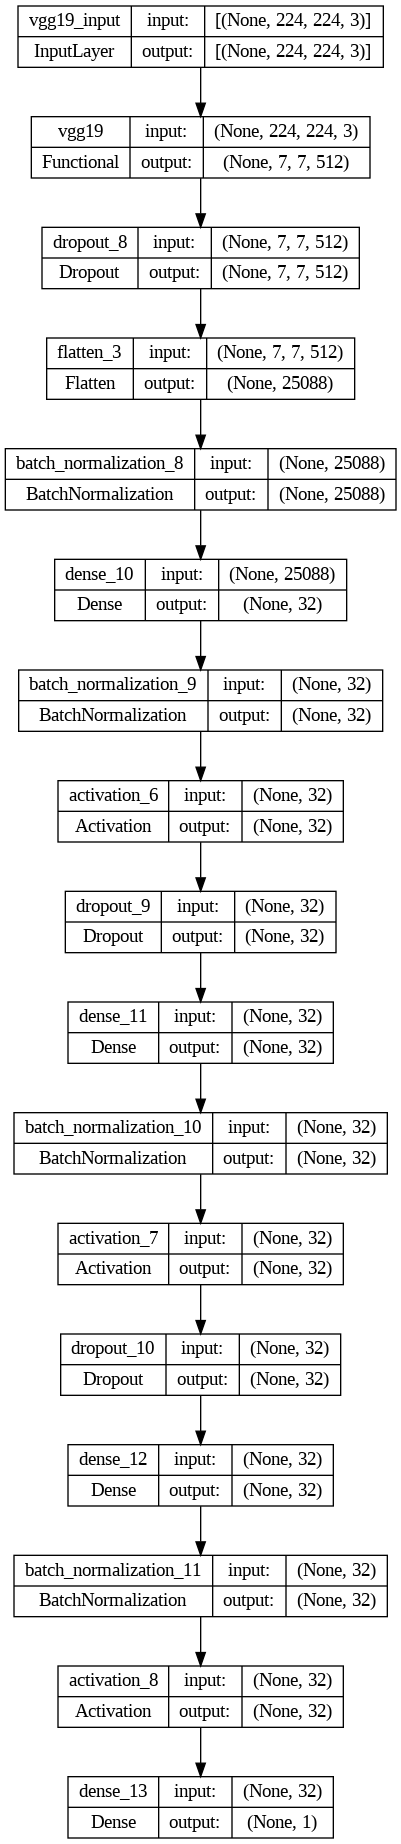

In [23]:
tf.keras.utils.plot_model(VGG19, to_file='./VGG19.png', show_shapes=True,show_layer_names=True)
Image(filename='VGG19.png')

In [24]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('VGG19.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

VGG19.fit(train_dataset,validation_data=valid_dataset,epochs = 36,verbose = 1, callbacks=[lrd, mcp, es], shuffle=True)

Epoch 1/36
22/22 [==============================] - ETA: 0s - loss: 0.9058 - Accuracy: 0.5283 - Precision: 0.2919 - Recall: 0.8351 - AUC: 0.7694 - F1: 0.3467

22/22 [==============================] - 16s 521ms/step - loss: 0.9058 - Accuracy: 0.5283 - Precision: 0.2919 - Recall: 0.8351 - AUC: 0.7694 - F1: 0.3467 - val_loss: 0.4411 - val_Accuracy: 0.8485 - val_Precision: 1.0000 - val_Recall: 0.2857 - val_AUC: 0.7875 - val_F1: 0.3306 - lr: 0.0010
Epoch 2/36
22/22 [==============================] - ETA: 0s - loss: 0.6980 - Accuracy: 0.5823 - Precision: 0.3081 - Recall: 0.7600 - AUC: 0.7158 - F1: 0.4373

22/22 [==============================] - 11s 475ms/step - loss: 0.6980 - Accuracy: 0.5823 - Precision: 0.3081 - Recall: 0.7600 - AUC: 0.7158 - F1: 0.4373 - val_loss: 0.4202 - val_Accuracy: 0.8889 - val_Precision: 1.0000 - val_Recall: 0.4762 - val_AUC: 0.8965 - val_F1: 0.7197 - lr: 0.0010
Epoch 3/36
22/22 [==============================] - ETA: 0s - loss: 0.5824 - Accuracy: 0.6996 - Precision: 0.3837 - Recall: 0.6600 - AUC: 0.7544 - F1: 0.4848

22/22 [==============================] - 11s 518ms/step - loss: 0.5824 - Accuracy: 0.6996 - Precision: 0.3837 - Recall: 0.6600 - AUC: 0.7544 - F1: 0.4848 - val_loss: 0.4241 - val_Accuracy: 0.8889 - val_Precision: 1.0000 - val_Recall: 0.4762 - val_AUC: 0.8602 - val_F1: 0.4735 - lr: 0.0010
Epoch 4/36
22/22 [==============================] - ETA: 0s - loss: 0.5192 - Accuracy: 0.7868 - Precision: 0.5030 - Recall: 0.5600 - AUC: 0.7712 - F1: 0.5129

22/22 [==============================] - 11s 513ms/step - loss: 0.5192 - Accuracy: 0.7868 - Precision: 0.5030 - Recall: 0.5600 - AUC: 0.7712 - F1: 0.5129 - val_loss: 0.3860 - val_Accuracy: 0.8990 - val_Precision: 1.0000 - val_Recall: 0.5238 - val_AUC: 0.9576 - val_F1: 0.5250 - lr: 0.0010
Epoch 5/36
22/22 [==============================] - ETA: 0s - loss: 0.4323 - Accuracy: 0.8512 - Precision: 0.7054 - Recall: 0.5267 - AUC: 0.8087 - F1: 0.5982

22/22 [==============================] - 11s 518ms/step - loss: 0.4323 - Accuracy: 0.8512 - Precision: 0.7054 - Recall: 0.5267 - AUC: 0.8087 - F1: 0.5982 - val_loss: 0.3402 - val_Accuracy: 0.9495 - val_Precision: 1.0000 - val_Recall: 0.7619 - val_AUC: 0.9591 - val_F1: 0.6417 - lr: 0.0010
Epoch 6/36
22/22 [==============================] - ETA: 0s - loss: 0.3907 - Accuracy: 0.8770 - Precision: 0.7909 - Recall: 0.5800 - AUC: 0.8519 - F1: 0.6682

22/22 [==============================] - 12s 524ms/step - loss: 0.3907 - Accuracy: 0.8770 - Precision: 0.7909 - Recall: 0.5800 - AUC: 0.8519 - F1: 0.6682 - val_loss: 0.2654 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9957 - val_F1: 0.6773 - lr: 0.0010
Epoch 7/36
22/22 [==============================] - ETA: 0s - loss: 0.3480 - Accuracy: 0.8884 - Precision: 0.8462 - Recall: 0.5867 - AUC: 0.8669 - F1: 0.6886

22/22 [==============================] - 11s 514ms/step - loss: 0.3480 - Accuracy: 0.8884 - Precision: 0.8462 - Recall: 0.5867 - AUC: 0.8669 - F1: 0.6886 - val_loss: 0.2562 - val_Accuracy: 0.9495 - val_Precision: 1.0000 - val_Recall: 0.7619 - val_AUC: 0.9829 - val_F1: 0.8785 - lr: 0.0010
Epoch 8/36
22/22 [==============================] - ETA: 0s - loss: 0.3290 - Accuracy: 0.8784 - Precision: 0.8155 - Recall: 0.5600 - AUC: 0.8990 - F1: 0.6646

22/22 [==============================] - 11s 512ms/step - loss: 0.3290 - Accuracy: 0.8784 - Precision: 0.8155 - Recall: 0.5600 - AUC: 0.8990 - F1: 0.6646 - val_loss: 0.2162 - val_Accuracy: 0.9596 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9930 - val_F1: 0.6667 - lr: 0.0010
Epoch 9/36
22/22 [==============================] - ETA: 0s - loss: 0.2826 - Accuracy: 0.9041 - Precision: 0.8547 - Recall: 0.6667 - AUC: 0.9223 - F1: 0.7496

22/22 [==============================] - 11s 520ms/step - loss: 0.2826 - Accuracy: 0.9041 - Precision: 0.8547 - Recall: 0.6667 - AUC: 0.9223 - F1: 0.7496 - val_loss: 0.1704 - val_Accuracy: 0.9798 - val_Precision: 1.0000 - val_Recall: 0.9048 - val_AUC: 0.9896 - val_F1: 0.9687 - lr: 0.0010
Epoch 10/36
22/22 [==============================] - ETA: 0s - loss: 0.3128 - Accuracy: 0.8770 - Precision: 0.7963 - Recall: 0.5733 - AUC: 0.8956 - F1: 0.6537

22/22 [==============================] - 11s 511ms/step - loss: 0.3128 - Accuracy: 0.8770 - Precision: 0.7963 - Recall: 0.5733 - AUC: 0.8956 - F1: 0.6537 - val_loss: 0.1566 - val_Accuracy: 0.9697 - val_Precision: 1.0000 - val_Recall: 0.8571 - val_AUC: 0.9869 - val_F1: 0.9460 - lr: 0.0010
Epoch 11/36
22/22 [==============================] - ETA: 0s - loss: 0.2665 - Accuracy: 0.9027 - Precision: 0.8942 - Recall: 0.6200 - AUC: 0.9381 - F1: 0.7226

22/22 [==============================] - 11s 502ms/step - loss: 0.2665 - Accuracy: 0.9027 - Precision: 0.8942 - Recall: 0.6200 - AUC: 0.9381 - F1: 0.7226 - val_loss: 0.1329 - val_Accuracy: 0.9798 - val_Precision: 1.0000 - val_Recall: 0.9048 - val_AUC: 0.9905 - val_F1: 0.9500 - lr: 0.0010
Epoch 12/36
22/22 [==============================] - ETA: 0s - loss: 0.2717 - Accuracy: 0.9041 - Precision: 0.8609 - Recall: 0.6600 - AUC: 0.9291 - F1: 0.7404

22/22 [==============================] - 11s 478ms/step - loss: 0.2717 - Accuracy: 0.9041 - Precision: 0.8609 - Recall: 0.6600 - AUC: 0.9291 - F1: 0.7404 - val_loss: 0.1113 - val_Accuracy: 0.9798 - val_Precision: 1.0000 - val_Recall: 0.9048 - val_AUC: 0.9939 - val_F1: 0.9641 - lr: 0.0010
Epoch 13/36
22/22 [==============================] - ETA: 0s - loss: 0.2485 - Accuracy: 0.9027 - Precision: 0.8596 - Recall: 0.6533 - AUC: 0.9465 - F1: 0.7341

22/22 [==============================] - 11s 516ms/step - loss: 0.2485 - Accuracy: 0.9027 - Precision: 0.8596 - Recall: 0.6533 - AUC: 0.9465 - F1: 0.7341 - val_loss: 0.1007 - val_Accuracy: 0.9798 - val_Precision: 1.0000 - val_Recall: 0.9048 - val_AUC: 0.9936 - val_F1: 0.7188 - lr: 0.0010
Epoch 14/36
22/22 [==============================] - ETA: 0s - loss: 0.2304 - Accuracy: 0.9142 - Precision: 0.8814 - Recall: 0.6933 - AUC: 0.9478 - F1: 0.7641

22/22 [==============================] - 11s 512ms/step - loss: 0.2304 - Accuracy: 0.9142 - Precision: 0.8814 - Recall: 0.6933 - AUC: 0.9478 - F1: 0.7641 - val_loss: 0.0912 - val_Accuracy: 0.9798 - val_Precision: 1.0000 - val_Recall: 0.9048 - val_AUC: 0.9927 - val_F1: 0.9575 - lr: 0.0010
Epoch 15/36
22/22 [==============================] - ETA: 0s - loss: 0.2221 - Accuracy: 0.9199 - Precision: 0.8672 - Recall: 0.7400 - AUC: 0.9529 - F1: 0.7968

22/22 [==============================] - 12s 520ms/step - loss: 0.2221 - Accuracy: 0.9199 - Precision: 0.8672 - Recall: 0.7400 - AUC: 0.9529 - F1: 0.7968 - val_loss: 0.0924 - val_Accuracy: 0.9798 - val_Precision: 1.0000 - val_Recall: 0.9048 - val_AUC: 0.9918 - val_F1: 0.7106 - lr: 0.0010
Epoch 16/36
22/22 [==============================] - ETA: 0s - loss: 0.2438 - Accuracy: 0.8941 - Precision: 0.8167 - Recall: 0.6533 - AUC: 0.9578 - F1: 0.7013

22/22 [==============================] - 11s 498ms/step - loss: 0.2438 - Accuracy: 0.8941 - Precision: 0.8167 - Recall: 0.6533 - AUC: 0.9578 - F1: 0.7013 - val_loss: 0.0867 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9896 - val_F1: 0.7353 - lr: 0.0010
Epoch 17/36
22/22 [==============================] - ETA: 0s - loss: 0.1998 - Accuracy: 0.9270 - Precision: 0.8722 - Recall: 0.7733 - AUC: 0.9606 - F1: 0.8160

22/22 [==============================] - 11s 485ms/step - loss: 0.1998 - Accuracy: 0.9270 - Precision: 0.8722 - Recall: 0.7733 - AUC: 0.9606 - F1: 0.8160 - val_loss: 0.0889 - val_Accuracy: 0.9798 - val_Precision: 1.0000 - val_Recall: 0.9048 - val_AUC: 0.9890 - val_F1: 0.9500 - lr: 0.0010
Epoch 18/36
22/22 [==============================] - ETA: 0s - loss: 0.1776 - Accuracy: 0.9356 - Precision: 0.9134 - Recall: 0.7733 - AUC: 0.9702 - F1: 0.8372

22/22 [==============================] - 11s 515ms/step - loss: 0.1776 - Accuracy: 0.9356 - Precision: 0.9134 - Recall: 0.7733 - AUC: 0.9702 - F1: 0.8372 - val_loss: 0.0942 - val_Accuracy: 0.9697 - val_Precision: 0.9500 - val_Recall: 0.9048 - val_AUC: 0.9872 - val_F1: 0.9318 - lr: 0.0010
Epoch 19/36
22/22 [==============================] - ETA: 0s - loss: 0.1852 - Accuracy: 0.9371 - Precision: 0.9344 - Recall: 0.7600 - AUC: 0.9682 - F1: 0.8512

22/22 [==============================] - 11s 511ms/step - loss: 0.1852 - Accuracy: 0.9371 - Precision: 0.9344 - Recall: 0.7600 - AUC: 0.9682 - F1: 0.8512 - val_loss: 0.0807 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9884 - val_F1: 0.7273 - lr: 0.0010
Epoch 20/36
22/22 [==============================] - ETA: 0s - loss: 0.1643 - Accuracy: 0.9371 - Precision: 0.8786 - Recall: 0.8200 - AUC: 0.9721 - F1: 0.8455

22/22 [==============================] - 11s 509ms/step - loss: 0.1643 - Accuracy: 0.9371 - Precision: 0.8786 - Recall: 0.8200 - AUC: 0.9721 - F1: 0.8455 - val_loss: 0.0746 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9887 - val_F1: 0.9722 - lr: 0.0010
Epoch 21/36
22/22 [==============================] - ETA: 0s - loss: 0.2234 - Accuracy: 0.9113 - Precision: 0.7973 - Recall: 0.7867 - AUC: 0.9562 - F1: 0.7701

22/22 [==============================] - 13s 566ms/step - loss: 0.2234 - Accuracy: 0.9113 - Precision: 0.7973 - Recall: 0.7867 - AUC: 0.9562 - F1: 0.7701 - val_loss: 0.0649 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9908 - val_F1: 0.9833 - lr: 0.0010
Epoch 22/36
22/22 [==============================] - ETA: 0s - loss: 0.2357 - Accuracy: 0.9084 - Precision: 0.8071 - Recall: 0.7533 - AUC: 0.9493 - F1: 0.7630

22/22 [==============================] - 12s 519ms/step - loss: 0.2357 - Accuracy: 0.9084 - Precision: 0.8071 - Recall: 0.7533 - AUC: 0.9493 - F1: 0.7630 - val_loss: 0.0788 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9908 - val_F1: 0.9661 - lr: 0.0010
Epoch 23/36
22/22 [==============================] - ETA: 0s - loss: 0.1739 - Accuracy: 0.9413 - Precision: 0.9037 - Recall: 0.8133 - AUC: 0.9706 - F1: 0.8642

22/22 [==============================] - 11s 512ms/step - loss: 0.1739 - Accuracy: 0.9413 - Precision: 0.9037 - Recall: 0.8133 - AUC: 0.9706 - F1: 0.8642 - val_loss: 0.0823 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9860 - val_F1: 0.9583 - lr: 0.0010
Epoch 24/36
22/22 [==============================] - ETA: 0s - loss: 0.2011 - Accuracy: 0.9127 - Precision: 0.8248 - Recall: 0.7533 - AUC: 0.9637 - F1: 0.7676
Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


22/22 [==============================] - 12s 530ms/step - loss: 0.2011 - Accuracy: 0.9127 - Precision: 0.8248 - Recall: 0.7533 - AUC: 0.9637 - F1: 0.7676 - val_loss: 0.0913 - val_Accuracy: 0.9697 - val_Precision: 0.9091 - val_Recall: 0.9524 - val_AUC: 0.9811 - val_F1: 0.6808 - lr: 0.0010
Epoch 24: early stopping


In [40]:
VGG19_scores = VGG19.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 1s 140ms/step - loss: 0.0725 - Accuracy: 0.9802 - Precision: 0.9762 - Recall: 0.9318 - AUC: 0.9938 - F1: 0.9616


<h1 align="center" ><a id='xception'><b>Xception<b></a></h1>

In [26]:
Xception_base = tf.keras.applications.Xception(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in Xception_base.layers:
    layer.trainable = False

Xception=tf.keras.Sequential()
Xception.add(Xception_base)
Xception.add(tf.keras.layers.Dropout(0.5))
Xception.add(tf.keras.layers.Flatten())
Xception.add(tf.keras.layers.BatchNormalization())
Xception.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
Xception.add(tf.keras.layers.BatchNormalization())
Xception.add(tf.keras.layers.Activation('relu'))
Xception.add(tf.keras.layers.Dropout(0.5))
Xception.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
Xception.add(tf.keras.layers.BatchNormalization())
Xception.add(tf.keras.layers.Activation('relu'))
Xception.add(tf.keras.layers.Dropout(0.5))
Xception.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
Xception.add(tf.keras.layers.BatchNormalization())
Xception.add(tf.keras.layers.Activation('relu'))
Xception.add(tf.keras.layers.Dense(1,activation='sigmoid'))

Xception.summary()

Xception.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

83683744/83683744 [==============================] - 4s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 dropout_11 (Dropout)        (None, 7, 7, 2048)        0         
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization_16 (Bat  (None, 100352)           401408    
 chNormalization)                                                
                                                                 
 dense_14 (Dense)            (None, 32)                3211296   
                                                                 
 batch_normalization_17 (Bat  (None, 32)               

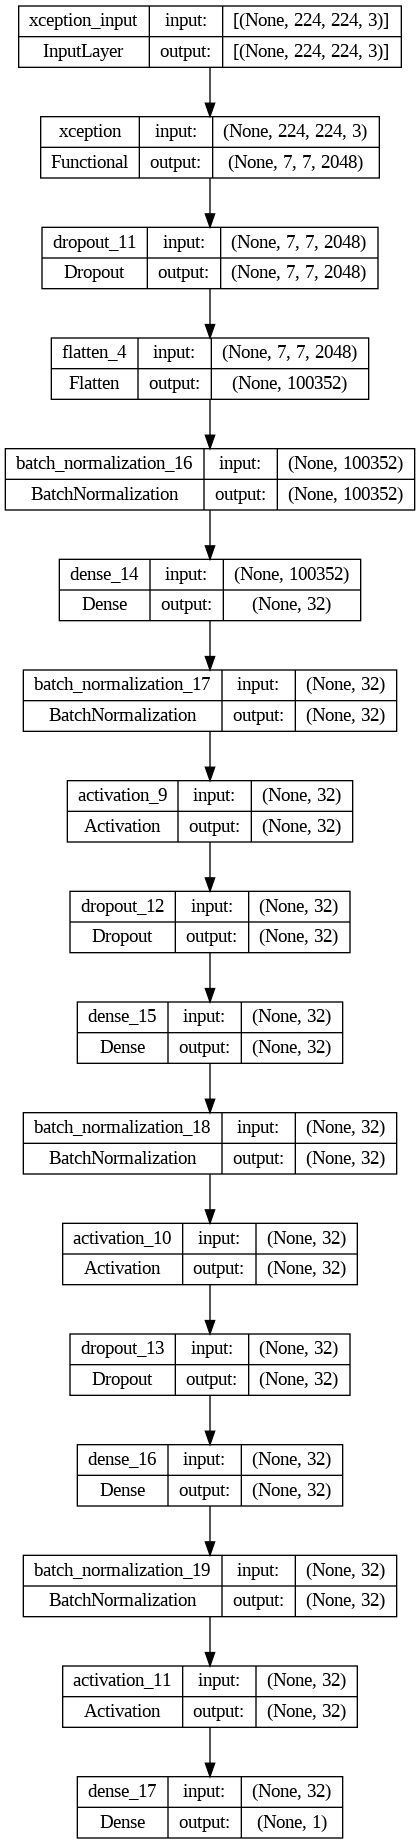

In [27]:
tf.keras.utils.plot_model(Xception, to_file='./Xception.png', show_shapes=True,show_layer_names=True)
Image(filename='Xception.png')

In [28]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('Xception.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

Xception.fit(train_dataset,validation_data=valid_dataset,epochs = 36,verbose = 1, callbacks=[lrd, mcp, es], shuffle=True)

Epoch 1/36
22/22 [==============================] - ETA: 0s - loss: 0.7788 - Accuracy: 0.5288 - Precision: 0.2904 - Recall: 0.8304 - AUC: 0.7596 - F1: 0.3946

22/22 [==============================] - 20s 666ms/step - loss: 0.7788 - Accuracy: 0.5288 - Precision: 0.2904 - Recall: 0.8304 - AUC: 0.7596 - F1: 0.3946 - val_loss: 0.9214 - val_Accuracy: 0.5354 - val_Precision: 0.3134 - val_Recall: 1.0000 - val_AUC: 0.9884 - val_F1: 0.5417 - lr: 0.0010
Epoch 2/36
22/22 [==============================] - ETA: 0s - loss: 0.5759 - Accuracy: 0.7139 - Precision: 0.4161 - Recall: 0.8267 - AUC: 0.8550 - F1: 0.5495

22/22 [==============================] - 10s 456ms/step - loss: 0.5759 - Accuracy: 0.7139 - Precision: 0.4161 - Recall: 0.8267 - AUC: 0.8550 - F1: 0.5495 - val_loss: 0.4606 - val_Accuracy: 0.8081 - val_Precision: 0.5263 - val_Recall: 0.9524 - val_AUC: 0.9823 - val_F1: 0.5152 - lr: 0.0010
Epoch 3/36
22/22 [==============================] - ETA: 0s - loss: 0.4857 - Accuracy: 0.8298 - Precision: 0.5779 - Recall: 0.7667 - AUC: 0.8736 - F1: 0.6539

22/22 [==============================] - 11s 486ms/step - loss: 0.4857 - Accuracy: 0.8298 - Precision: 0.5779 - Recall: 0.7667 - AUC: 0.8736 - F1: 0.6539 - val_loss: 0.3385 - val_Accuracy: 0.8687 - val_Precision: 0.6250 - val_Recall: 0.9524 - val_AUC: 0.9927 - val_F1: 0.5737 - lr: 0.0010
Epoch 4/36
22/22 [==============================] - ETA: 0s - loss: 0.3993 - Accuracy: 0.8712 - Precision: 0.6852 - Recall: 0.7400 - AUC: 0.9128 - F1: 0.6967

22/22 [==============================] - 11s 501ms/step - loss: 0.3993 - Accuracy: 0.8712 - Precision: 0.6852 - Recall: 0.7400 - AUC: 0.9128 - F1: 0.6967 - val_loss: 0.3072 - val_Accuracy: 0.9091 - val_Precision: 0.7143 - val_Recall: 0.9524 - val_AUC: 0.9902 - val_F1: 0.8566 - lr: 0.0010
Epoch 5/36
22/22 [==============================] - ETA: 0s - loss: 0.3605 - Accuracy: 0.8913 - Precision: 0.7761 - Recall: 0.6933 - AUC: 0.8978 - F1: 0.7350

22/22 [==============================] - 11s 509ms/step - loss: 0.3605 - Accuracy: 0.8913 - Precision: 0.7761 - Recall: 0.6933 - AUC: 0.8978 - F1: 0.7350 - val_loss: 0.2687 - val_Accuracy: 0.9293 - val_Precision: 0.7692 - val_Recall: 0.9524 - val_AUC: 0.9911 - val_F1: 0.8816 - lr: 0.0010
Epoch 6/36
22/22 [==============================] - ETA: 0s - loss: 0.3149 - Accuracy: 0.9070 - Precision: 0.8295 - Recall: 0.7133 - AUC: 0.9364 - F1: 0.7492

22/22 [==============================] - 11s 512ms/step - loss: 0.3149 - Accuracy: 0.9070 - Precision: 0.8295 - Recall: 0.7133 - AUC: 0.9364 - F1: 0.7492 - val_loss: 0.2367 - val_Accuracy: 0.9293 - val_Precision: 0.8500 - val_Recall: 0.8095 - val_AUC: 0.9811 - val_F1: 0.8611 - lr: 0.0010
Epoch 7/36
22/22 [==============================] - ETA: 0s - loss: 0.2821 - Accuracy: 0.8913 - Precision: 0.8083 - Recall: 0.6467 - AUC: 0.9354 - F1: 0.7122

22/22 [==============================] - 10s 464ms/step - loss: 0.2821 - Accuracy: 0.8913 - Precision: 0.8083 - Recall: 0.6467 - AUC: 0.9354 - F1: 0.7122 - val_loss: 0.1950 - val_Accuracy: 0.9596 - val_Precision: 0.8696 - val_Recall: 0.9524 - val_AUC: 0.9933 - val_F1: 0.9284 - lr: 0.0010
Epoch 8/36
22/22 [==============================] - ETA: 0s - loss: 0.2559 - Accuracy: 0.9084 - Precision: 0.8359 - Recall: 0.7133 - AUC: 0.9486 - F1: 0.7700

22/22 [==============================] - 11s 506ms/step - loss: 0.2559 - Accuracy: 0.9084 - Precision: 0.8359 - Recall: 0.7133 - AUC: 0.9486 - F1: 0.7700 - val_loss: 0.1925 - val_Accuracy: 0.9394 - val_Precision: 0.8000 - val_Recall: 0.9524 - val_AUC: 0.9896 - val_F1: 0.8948 - lr: 0.0010
Epoch 9/36
22/22 [==============================] - ETA: 0s - loss: 0.2385 - Accuracy: 0.9170 - Precision: 0.8433 - Recall: 0.7533 - AUC: 0.9541 - F1: 0.7791

22/22 [==============================] - 11s 503ms/step - loss: 0.2385 - Accuracy: 0.9170 - Precision: 0.8433 - Recall: 0.7533 - AUC: 0.9541 - F1: 0.7791 - val_loss: 0.1664 - val_Accuracy: 0.9495 - val_Precision: 0.8333 - val_Recall: 0.9524 - val_AUC: 0.9902 - val_F1: 0.8959 - lr: 0.0010
Epoch 10/36
22/22 [==============================] - ETA: 0s - loss: 0.2411 - Accuracy: 0.9156 - Precision: 0.8527 - Recall: 0.7333 - AUC: 0.9416 - F1: 0.7834

22/22 [==============================] - 11s 510ms/step - loss: 0.2411 - Accuracy: 0.9156 - Precision: 0.8527 - Recall: 0.7333 - AUC: 0.9416 - F1: 0.7834 - val_loss: 0.1497 - val_Accuracy: 0.9495 - val_Precision: 0.8333 - val_Recall: 0.9524 - val_AUC: 0.9933 - val_F1: 0.9000 - lr: 0.0010
Epoch 11/36
22/22 [==============================] - ETA: 0s - loss: 0.2216 - Accuracy: 0.9242 - Precision: 0.8760 - Recall: 0.7533 - AUC: 0.9502 - F1: 0.8106

22/22 [==============================] - 10s 474ms/step - loss: 0.2216 - Accuracy: 0.9242 - Precision: 0.8760 - Recall: 0.7533 - AUC: 0.9502 - F1: 0.8106 - val_loss: 0.1354 - val_Accuracy: 0.9495 - val_Precision: 0.8333 - val_Recall: 0.9524 - val_AUC: 0.9939 - val_F1: 0.6728 - lr: 0.0010
Epoch 12/36
22/22 [==============================] - ETA: 0s - loss: 0.1755 - Accuracy: 0.9471 - Precision: 0.9313 - Recall: 0.8133 - AUC: 0.9721 - F1: 0.8619

22/22 [==============================] - 10s 462ms/step - loss: 0.1755 - Accuracy: 0.9471 - Precision: 0.9313 - Recall: 0.8133 - AUC: 0.9721 - F1: 0.8619 - val_loss: 0.1150 - val_Accuracy: 0.9495 - val_Precision: 0.8333 - val_Recall: 0.9524 - val_AUC: 0.9939 - val_F1: 0.6599 - lr: 0.0010
Epoch 13/36
22/22 [==============================] - ETA: 0s - loss: 0.1714 - Accuracy: 0.9313 - Precision: 0.8643 - Recall: 0.8067 - AUC: 0.9762 - F1: 0.8259

22/22 [==============================] - 11s 503ms/step - loss: 0.1714 - Accuracy: 0.9313 - Precision: 0.8643 - Recall: 0.8067 - AUC: 0.9762 - F1: 0.8259 - val_loss: 0.1087 - val_Accuracy: 0.9495 - val_Precision: 0.8333 - val_Recall: 0.9524 - val_AUC: 0.9939 - val_F1: 0.9169 - lr: 0.0010
Epoch 14/36
22/22 [==============================] - ETA: 0s - loss: 0.1612 - Accuracy: 0.9413 - Precision: 0.9037 - Recall: 0.8133 - AUC: 0.9703 - F1: 0.8616

22/22 [==============================] - 11s 504ms/step - loss: 0.1612 - Accuracy: 0.9413 - Precision: 0.9037 - Recall: 0.8133 - AUC: 0.9703 - F1: 0.8616 - val_loss: 0.0978 - val_Accuracy: 0.9697 - val_Precision: 0.9091 - val_Recall: 0.9524 - val_AUC: 0.9957 - val_F1: 0.6995 - lr: 0.0010
Epoch 15/36
22/22 [==============================] - ETA: 0s - loss: 0.1750 - Accuracy: 0.9342 - Precision: 0.8768 - Recall: 0.8067 - AUC: 0.9768 - F1: 0.8305

22/22 [==============================] - 11s 502ms/step - loss: 0.1750 - Accuracy: 0.9342 - Precision: 0.8768 - Recall: 0.8067 - AUC: 0.9768 - F1: 0.8305 - val_loss: 0.0891 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9927 - val_F1: 0.7045 - lr: 0.0010
Epoch 16/36
22/22 [==============================] - ETA: 0s - loss: 0.1581 - Accuracy: 0.9485 - Precision: 0.9191 - Recall: 0.8333 - AUC: 0.9768 - F1: 0.8745

22/22 [==============================] - 11s 483ms/step - loss: 0.1581 - Accuracy: 0.9485 - Precision: 0.9191 - Recall: 0.8333 - AUC: 0.9768 - F1: 0.8745 - val_loss: 0.0794 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9945 - val_F1: 0.9511 - lr: 0.0010
Epoch 17/36
22/22 [==============================] - ETA: 0s - loss: 0.1523 - Accuracy: 0.9428 - Precision: 0.8929 - Recall: 0.8333 - AUC: 0.9836 - F1: 0.8593

22/22 [==============================] - 11s 497ms/step - loss: 0.1523 - Accuracy: 0.9428 - Precision: 0.8929 - Recall: 0.8333 - AUC: 0.9836 - F1: 0.8593 - val_loss: 0.0746 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9942 - val_F1: 0.7000 - lr: 0.0010
Epoch 18/36
22/22 [==============================] - ETA: 0s - loss: 0.1542 - Accuracy: 0.9456 - Precision: 0.9179 - Recall: 0.8200 - AUC: 0.9806 - F1: 0.8521

22/22 [==============================] - 11s 511ms/step - loss: 0.1542 - Accuracy: 0.9456 - Precision: 0.9179 - Recall: 0.8200 - AUC: 0.9806 - F1: 0.8521 - val_loss: 0.0662 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9945 - val_F1: 0.9375 - lr: 0.0010
Epoch 19/36
22/22 [==============================] - ETA: 0s - loss: 0.1466 - Accuracy: 0.9514 - Precision: 0.9328 - Recall: 0.8333 - AUC: 0.9764 - F1: 0.8896

22/22 [==============================] - 12s 561ms/step - loss: 0.1466 - Accuracy: 0.9514 - Precision: 0.9328 - Recall: 0.8333 - AUC: 0.9764 - F1: 0.8896 - val_loss: 0.0781 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9942 - val_F1: 0.7011 - lr: 0.0010
Epoch 20/36
22/22 [==============================] - ETA: 0s - loss: 0.1111 - Accuracy: 0.9657 - Precision: 0.9315 - Recall: 0.9067 - AUC: 0.9849 - F1: 0.9184

22/22 [==============================] - 14s 645ms/step - loss: 0.1111 - Accuracy: 0.9657 - Precision: 0.9315 - Recall: 0.9067 - AUC: 0.9849 - F1: 0.9184 - val_loss: 0.0788 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9933 - val_F1: 0.9583 - lr: 0.0010
Epoch 21/36
22/22 [==============================] - ETA: 0s - loss: 0.1481 - Accuracy: 0.9542 - Precision: 0.9155 - Recall: 0.8667 - AUC: 0.9723 - F1: 0.8895
Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


22/22 [==============================] - 11s 519ms/step - loss: 0.1481 - Accuracy: 0.9542 - Precision: 0.9155 - Recall: 0.8667 - AUC: 0.9723 - F1: 0.8895 - val_loss: 0.0791 - val_Accuracy: 0.9798 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9957 - val_F1: 0.9661 - lr: 0.0010
Epoch 21: early stopping


In [41]:
Xception_scores = Xception.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 2s 244ms/step - loss: 0.0268 - Accuracy: 0.9950 - Precision: 0.9778 - Recall: 1.0000 - AUC: 1.0000 - F1: 0.8442


<h1 align="center" ><a id='inceptionv3'><b>InceptionV3<b></a></h1>

In [29]:
InceptionV3_base = tf.keras.applications.InceptionV3(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in InceptionV3_base.layers:
    layer.trainable = False

InceptionV3=tf.keras.Sequential()
InceptionV3.add(InceptionV3_base)
InceptionV3.add(tf.keras.layers.Dropout(0.5))
InceptionV3.add(tf.keras.layers.Flatten())
InceptionV3.add(tf.keras.layers.BatchNormalization())
InceptionV3.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
InceptionV3.add(tf.keras.layers.BatchNormalization())
InceptionV3.add(tf.keras.layers.Activation('relu'))
InceptionV3.add(tf.keras.layers.Dropout(0.5))
InceptionV3.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
InceptionV3.add(tf.keras.layers.BatchNormalization())
InceptionV3.add(tf.keras.layers.Activation('relu'))
InceptionV3.add(tf.keras.layers.Dropout(0.5))
InceptionV3.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
InceptionV3.add(tf.keras.layers.BatchNormalization())
InceptionV3.add(tf.keras.layers.Activation('relu'))
InceptionV3.add(tf.keras.layers.Dense(1,activation='sigmoid'))

InceptionV3.summary()

InceptionV3.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

87910968/87910968 [==============================] - 1s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 dropout_14 (Dropout)        (None, 5, 5, 2048)        0         
                                                                 
 flatten_5 (Flatten)         (None, 51200)             0         
                                                                 
 batch_normalization_114 (Ba  (None, 51200)            204800    
 tchNormalization)                                               
                                                                 
 dense_18 (Dense)            (None, 32)                1638432   
                                                                 
 batch_normalization_115 (Ba  (None, 32)               

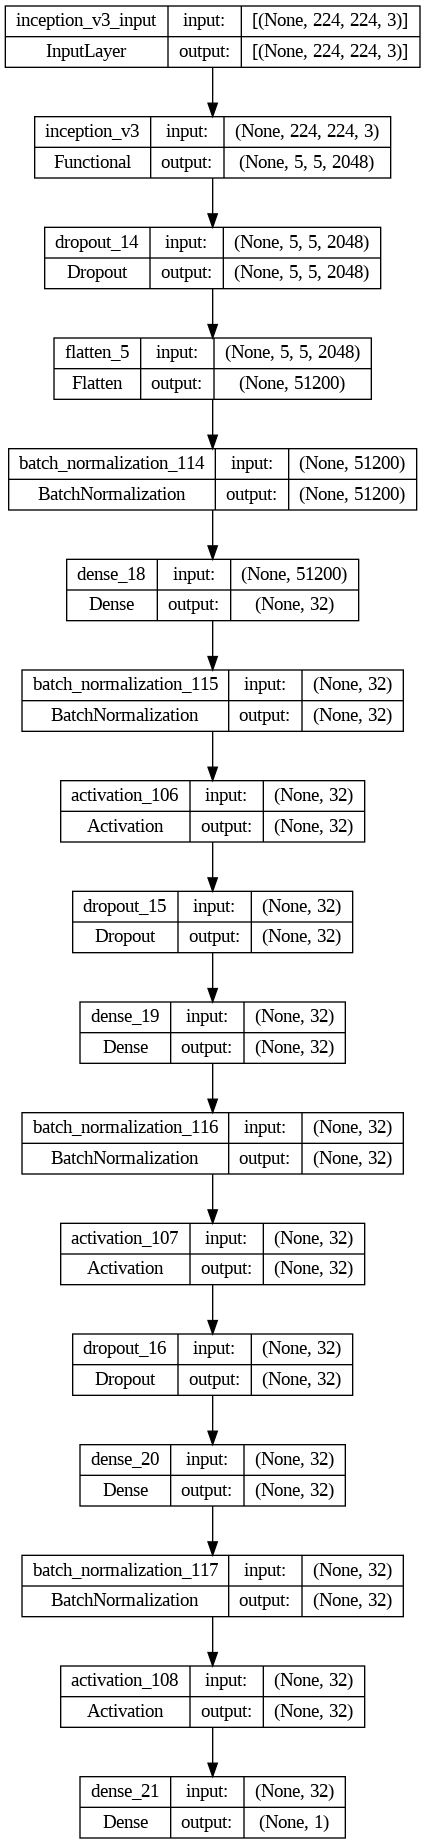

In [30]:
tf.keras.utils.plot_model(InceptionV3, to_file='./InceptionV3.png', show_shapes=True,show_layer_names=True)
Image(filename='InceptionV3.png')

In [31]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('InceptionV3.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

InceptionV3.fit(train_dataset,validation_data=valid_dataset,epochs = 36,verbose = 1, callbacks=[lrd, mcp, es], shuffle=True)

Epoch 1/36
22/22 [==============================] - ETA: 0s - loss: 0.7164 - Accuracy: 0.6754 - Precision: 0.3798 - Recall: 0.8129 - AUC: 0.8215 - F1: 0.4880

22/22 [==============================] - 24s 739ms/step - loss: 0.7164 - Accuracy: 0.6754 - Precision: 0.3798 - Recall: 0.8129 - AUC: 0.8215 - F1: 0.4880 - val_loss: 0.3411 - val_Accuracy: 0.8788 - val_Precision: 0.6452 - val_Recall: 0.9524 - val_AUC: 0.9634 - val_F1: 0.5719 - lr: 0.0010
Epoch 2/36
22/22 [==============================] - ETA: 0s - loss: 0.5193 - Accuracy: 0.8197 - Precision: 0.5577 - Recall: 0.7733 - AUC: 0.8701 - F1: 0.6422

22/22 [==============================] - 10s 459ms/step - loss: 0.5193 - Accuracy: 0.8197 - Precision: 0.5577 - Recall: 0.7733 - AUC: 0.8701 - F1: 0.6422 - val_loss: 0.4281 - val_Accuracy: 0.8788 - val_Precision: 0.6452 - val_Recall: 0.9524 - val_AUC: 0.9621 - val_F1: 0.8154 - lr: 0.0010
Epoch 3/36
22/22 [==============================] - ETA: 0s - loss: 0.4004 - Accuracy: 0.8884 - Precision: 0.7195 - Recall: 0.7867 - AUC: 0.9264 - F1: 0.7375

22/22 [==============================] - 16s 726ms/step - loss: 0.4004 - Accuracy: 0.8884 - Precision: 0.7195 - Recall: 0.7867 - AUC: 0.9264 - F1: 0.7375 - val_loss: 0.4336 - val_Accuracy: 0.8586 - val_Precision: 0.6061 - val_Recall: 0.9524 - val_AUC: 0.9902 - val_F1: 0.5726 - lr: 0.0010
Epoch 4/36
22/22 [==============================] - ETA: 0s - loss: 0.3270 - Accuracy: 0.9099 - Precision: 0.8042 - Recall: 0.7667 - AUC: 0.9345 - F1: 0.7880

22/22 [==============================] - 13s 576ms/step - loss: 0.3270 - Accuracy: 0.9099 - Precision: 0.8042 - Recall: 0.7667 - AUC: 0.9345 - F1: 0.7880 - val_loss: 0.3183 - val_Accuracy: 0.9394 - val_Precision: 0.8000 - val_Recall: 0.9524 - val_AUC: 0.9853 - val_F1: 0.9009 - lr: 0.0010
Epoch 5/36
22/22 [==============================] - ETA: 0s - loss: 0.2889 - Accuracy: 0.9070 - Precision: 0.7852 - Recall: 0.7800 - AUC: 0.9562 - F1: 0.7823

22/22 [==============================] - 11s 504ms/step - loss: 0.2889 - Accuracy: 0.9070 - Precision: 0.7852 - Recall: 0.7800 - AUC: 0.9562 - F1: 0.7823 - val_loss: 0.2850 - val_Accuracy: 0.9495 - val_Precision: 0.8077 - val_Recall: 1.0000 - val_AUC: 0.9939 - val_F1: 0.6910 - lr: 0.0010
Epoch 6/36
22/22 [==============================] - ETA: 0s - loss: 0.2743 - Accuracy: 0.9127 - Precision: 0.8397 - Recall: 0.7333 - AUC: 0.9514 - F1: 0.7676

22/22 [==============================] - 11s 505ms/step - loss: 0.2743 - Accuracy: 0.9127 - Precision: 0.8397 - Recall: 0.7333 - AUC: 0.9514 - F1: 0.7676 - val_loss: 0.2142 - val_Accuracy: 0.9394 - val_Precision: 0.8000 - val_Recall: 0.9524 - val_AUC: 0.9951 - val_F1: 0.6496 - lr: 0.0010
Epoch 7/36
22/22 [==============================] - ETA: 0s - loss: 0.2233 - Accuracy: 0.9413 - Precision: 0.9160 - Recall: 0.8000 - AUC: 0.9695 - F1: 0.8508

22/22 [==============================] - 10s 455ms/step - loss: 0.2233 - Accuracy: 0.9413 - Precision: 0.9160 - Recall: 0.8000 - AUC: 0.9695 - F1: 0.8508 - val_loss: 0.1800 - val_Accuracy: 0.9697 - val_Precision: 0.8750 - val_Recall: 1.0000 - val_AUC: 0.9951 - val_F1: 0.7186 - lr: 0.0010
Epoch 8/36
22/22 [==============================] - ETA: 0s - loss: 0.2098 - Accuracy: 0.9242 - Precision: 0.8819 - Recall: 0.7467 - AUC: 0.9713 - F1: 0.8004

22/22 [==============================] - 11s 474ms/step - loss: 0.2098 - Accuracy: 0.9242 - Precision: 0.8819 - Recall: 0.7467 - AUC: 0.9713 - F1: 0.8004 - val_loss: 0.1431 - val_Accuracy: 0.9697 - val_Precision: 0.8750 - val_Recall: 1.0000 - val_AUC: 0.9963 - val_F1: 0.6994 - lr: 0.0010
Epoch 9/36
22/22 [==============================] - ETA: 0s - loss: 0.2240 - Accuracy: 0.9213 - Precision: 0.8519 - Recall: 0.7667 - AUC: 0.9589 - F1: 0.7872

22/22 [==============================] - 11s 496ms/step - loss: 0.2240 - Accuracy: 0.9213 - Precision: 0.8519 - Recall: 0.7667 - AUC: 0.9589 - F1: 0.7872 - val_loss: 0.1444 - val_Accuracy: 0.9697 - val_Precision: 0.8750 - val_Recall: 1.0000 - val_AUC: 0.9945 - val_F1: 0.9559 - lr: 0.0010
Epoch 10/36
22/22 [==============================] - ETA: 0s - loss: 0.1790 - Accuracy: 0.9356 - Precision: 0.8947 - Recall: 0.7933 - AUC: 0.9763 - F1: 0.8410

22/22 [==============================] - 11s 497ms/step - loss: 0.1790 - Accuracy: 0.9356 - Precision: 0.8947 - Recall: 0.7933 - AUC: 0.9763 - F1: 0.8410 - val_loss: 0.0980 - val_Accuracy: 0.9697 - val_Precision: 0.8750 - val_Recall: 1.0000 - val_AUC: 0.9963 - val_F1: 0.9318 - lr: 0.0010
Epoch 11/36
22/22 [==============================] - ETA: 0s - loss: 0.1468 - Accuracy: 0.9542 - Precision: 0.9097 - Recall: 0.8733 - AUC: 0.9831 - F1: 0.8828

22/22 [==============================] - 10s 441ms/step - loss: 0.1468 - Accuracy: 0.9542 - Precision: 0.9097 - Recall: 0.8733 - AUC: 0.9831 - F1: 0.8828 - val_loss: 0.0890 - val_Accuracy: 0.9798 - val_Precision: 0.9130 - val_Recall: 1.0000 - val_AUC: 0.9976 - val_F1: 0.9667 - lr: 0.0010
Epoch 12/36
22/22 [==============================] - ETA: 0s - loss: 0.1543 - Accuracy: 0.9456 - Precision: 0.9242 - Recall: 0.8133 - AUC: 0.9764 - F1: 0.8629

22/22 [==============================] - 11s 491ms/step - loss: 0.1543 - Accuracy: 0.9456 - Precision: 0.9242 - Recall: 0.8133 - AUC: 0.9764 - F1: 0.8629 - val_loss: 0.0961 - val_Accuracy: 0.9697 - val_Precision: 0.8750 - val_Recall: 1.0000 - val_AUC: 0.9927 - val_F1: 0.6960 - lr: 0.0010
Epoch 13/36
22/22 [==============================] - ETA: 0s - loss: 0.1677 - Accuracy: 0.9485 - Precision: 0.9130 - Recall: 0.8400 - AUC: 0.9771 - F1: 0.8769

22/22 [==============================] - 11s 489ms/step - loss: 0.1677 - Accuracy: 0.9485 - Precision: 0.9130 - Recall: 0.8400 - AUC: 0.9771 - F1: 0.8769 - val_loss: 0.0949 - val_Accuracy: 0.9697 - val_Precision: 0.8750 - val_Recall: 1.0000 - val_AUC: 0.9945 - val_F1: 0.7011 - lr: 0.0010
Epoch 14/36
22/22 [==============================] - ETA: 0s - loss: 0.1938 - Accuracy: 0.9285 - Precision: 0.8676 - Recall: 0.7867 - AUC: 0.9657 - F1: 0.8063
Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


22/22 [==============================] - 11s 497ms/step - loss: 0.1938 - Accuracy: 0.9285 - Precision: 0.8676 - Recall: 0.7867 - AUC: 0.9657 - F1: 0.8063 - val_loss: 0.1027 - val_Accuracy: 0.9596 - val_Precision: 0.8696 - val_Recall: 0.9524 - val_AUC: 0.9933 - val_F1: 0.9244 - lr: 0.0010
Epoch 14: early stopping


In [42]:
InceptionV3_scores = InceptionV3.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 2s 266ms/step - loss: 0.0765 - Accuracy: 0.9851 - Precision: 0.9556 - Recall: 0.9773 - AUC: 0.9957 - F1: 0.9726


<h1 align="center" ><a id='resnet50'><b>ResNet50<b></a></h1>

In [32]:
ResNet50_base = tf.keras.applications.ResNet50(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in ResNet50_base.layers:
    layer.trainable = False

ResNet50=tf.keras.Sequential()
ResNet50.add(ResNet50_base)
ResNet50.add(tf.keras.layers.Dropout(0.5))
ResNet50.add(tf.keras.layers.Flatten())
ResNet50.add(tf.keras.layers.BatchNormalization())
ResNet50.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
ResNet50.add(tf.keras.layers.BatchNormalization())
ResNet50.add(tf.keras.layers.Activation('relu'))
ResNet50.add(tf.keras.layers.Dropout(0.5))
ResNet50.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
ResNet50.add(tf.keras.layers.BatchNormalization())
ResNet50.add(tf.keras.layers.Activation('relu'))
ResNet50.add(tf.keras.layers.Dropout(0.5))
ResNet50.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
ResNet50.add(tf.keras.layers.BatchNormalization())
ResNet50.add(tf.keras.layers.Activation('relu'))
ResNet50.add(tf.keras.layers.Dense(1,activation='sigmoid'))

ResNet50.summary()

ResNet50.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 dropout_17 (Dropout)        (None, 7, 7, 2048)        0         
                                                                 
 flatten_6 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization_118 (Ba  (None, 100352)           401408    
 tchNormalization)                                               
                                                                 
 dense_22 (Dense)            (None, 32)                3211296   
                                                                 
 batch_normalization_119 (Ba  (None, 32)               

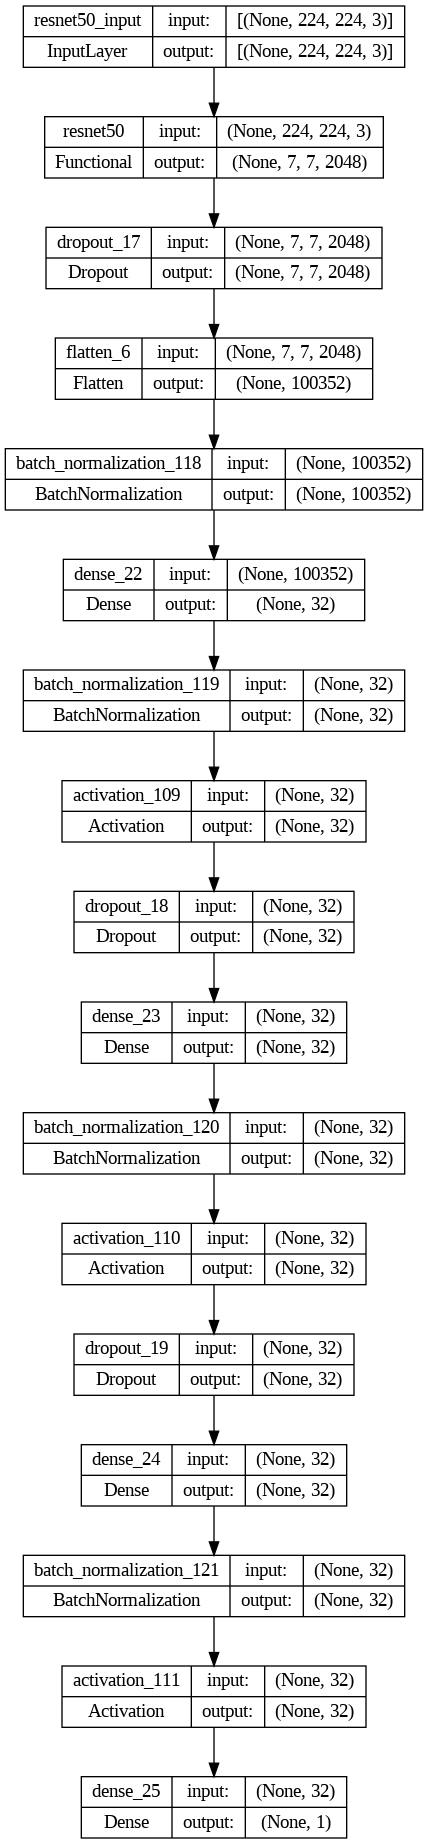

In [33]:
tf.keras.utils.plot_model(ResNet50, to_file='./ResNet50.png', show_shapes=True,show_layer_names=True)
Image(filename='ResNet50.png')

In [34]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('ResNet50.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

ResNet50.fit(train_dataset,validation_data=valid_dataset,epochs = 36,verbose = 1, callbacks=[lrd, mcp, es], shuffle=True)

Epoch 1/36
22/22 [==============================] - ETA: 0s - loss: 0.7967 - Accuracy: 0.5363 - Precision: 0.2851 - Recall: 0.7719 - AUC: 0.6733 - F1: 0.3696

22/22 [==============================] - 20s 607ms/step - loss: 0.7967 - Accuracy: 0.5363 - Precision: 0.2851 - Recall: 0.7719 - AUC: 0.6733 - F1: 0.3696 - val_loss: 0.4011 - val_Accuracy: 0.8384 - val_Precision: 0.8571 - val_Recall: 0.2857 - val_AUC: 0.8272 - val_F1: 0.3325 - lr: 0.0010
Epoch 2/36
22/22 [==============================] - ETA: 0s - loss: 0.6524 - Accuracy: 0.6495 - Precision: 0.3260 - Recall: 0.5933 - AUC: 0.6575 - F1: 0.4196

22/22 [==============================] - 11s 499ms/step - loss: 0.6524 - Accuracy: 0.6495 - Precision: 0.3260 - Recall: 0.5933 - AUC: 0.6575 - F1: 0.4196 - val_loss: 0.3305 - val_Accuracy: 0.8586 - val_Precision: 0.8182 - val_Recall: 0.4286 - val_AUC: 0.9045 - val_F1: 0.4643 - lr: 0.0010
Epoch 3/36
22/22 [==============================] - ETA: 0s - loss: 0.5357 - Accuracy: 0.7711 - Precision: 0.4731 - Recall: 0.5867 - AUC: 0.7710 - F1: 0.5130

22/22 [==============================] - 11s 504ms/step - loss: 0.5357 - Accuracy: 0.7711 - Precision: 0.4731 - Recall: 0.5867 - AUC: 0.7710 - F1: 0.5130 - val_loss: 0.3211 - val_Accuracy: 0.8687 - val_Precision: 0.9000 - val_Recall: 0.4286 - val_AUC: 0.9356 - val_F1: 0.6396 - lr: 0.0010
Epoch 4/36
22/22 [==============================] - ETA: 0s - loss: 0.4956 - Accuracy: 0.7825 - Precision: 0.4917 - Recall: 0.3933 - AUC: 0.7549 - F1: 0.4118

22/22 [==============================] - 11s 495ms/step - loss: 0.4956 - Accuracy: 0.7825 - Precision: 0.4917 - Recall: 0.3933 - AUC: 0.7549 - F1: 0.4118 - val_loss: 0.3000 - val_Accuracy: 0.8687 - val_Precision: 0.8333 - val_Recall: 0.4762 - val_AUC: 0.9411 - val_F1: 0.4485 - lr: 0.0010
Epoch 5/36
22/22 [==============================] - ETA: 0s - loss: 0.4561 - Accuracy: 0.8197 - Precision: 0.6333 - Recall: 0.3800 - AUC: 0.7860 - F1: 0.4971

22/22 [==============================] - 10s 443ms/step - loss: 0.4561 - Accuracy: 0.8197 - Precision: 0.6333 - Recall: 0.3800 - AUC: 0.7860 - F1: 0.4971 - val_loss: 0.2822 - val_Accuracy: 0.8788 - val_Precision: 0.7647 - val_Recall: 0.6190 - val_AUC: 0.9396 - val_F1: 0.7500 - lr: 0.0010
Epoch 6/36
22/22 [==============================] - ETA: 0s - loss: 0.4180 - Accuracy: 0.8355 - Precision: 0.7160 - Recall: 0.3867 - AUC: 0.8091 - F1: 0.5046

22/22 [==============================] - 11s 489ms/step - loss: 0.4180 - Accuracy: 0.8355 - Precision: 0.7160 - Recall: 0.3867 - AUC: 0.8091 - F1: 0.5046 - val_loss: 0.2384 - val_Accuracy: 0.8889 - val_Precision: 0.8125 - val_Recall: 0.6190 - val_AUC: 0.9664 - val_F1: 0.5417 - lr: 0.0010
Epoch 7/36
22/22 [==============================] - ETA: 0s - loss: 0.4145 - Accuracy: 0.8283 - Precision: 0.6875 - Recall: 0.3667 - AUC: 0.8037 - F1: 0.4742

22/22 [==============================] - 11s 490ms/step - loss: 0.4145 - Accuracy: 0.8283 - Precision: 0.6875 - Recall: 0.3667 - AUC: 0.8037 - F1: 0.4742 - val_loss: 0.2374 - val_Accuracy: 0.8990 - val_Precision: 0.8235 - val_Recall: 0.6667 - val_AUC: 0.9548 - val_F1: 0.5278 - lr: 0.0010
Epoch 8/36
22/22 [==============================] - ETA: 0s - loss: 0.3977 - Accuracy: 0.8226 - Precision: 0.6625 - Recall: 0.3533 - AUC: 0.8378 - F1: 0.4378

22/22 [==============================] - 11s 498ms/step - loss: 0.3977 - Accuracy: 0.8226 - Precision: 0.6625 - Recall: 0.3533 - AUC: 0.8378 - F1: 0.4378 - val_loss: 0.2452 - val_Accuracy: 0.8485 - val_Precision: 0.6250 - val_Recall: 0.7143 - val_AUC: 0.9588 - val_F1: 0.5137 - lr: 0.0010
Epoch 9/36
22/22 [==============================] - ETA: 0s - loss: 0.3951 - Accuracy: 0.8326 - Precision: 0.6897 - Recall: 0.4000 - AUC: 0.8206 - F1: 0.4937

22/22 [==============================] - 11s 490ms/step - loss: 0.3951 - Accuracy: 0.8326 - Precision: 0.6897 - Recall: 0.4000 - AUC: 0.8206 - F1: 0.4937 - val_loss: 0.2733 - val_Accuracy: 0.8788 - val_Precision: 0.6957 - val_Recall: 0.7619 - val_AUC: 0.9499 - val_F1: 0.5726 - lr: 0.0010
Epoch 10/36
22/22 [==============================] - ETA: 0s - loss: 0.3693 - Accuracy: 0.8498 - Precision: 0.7711 - Recall: 0.4267 - AUC: 0.8343 - F1: 0.5449
Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


22/22 [==============================] - 10s 443ms/step - loss: 0.3693 - Accuracy: 0.8498 - Precision: 0.7711 - Recall: 0.4267 - AUC: 0.8343 - F1: 0.5449 - val_loss: 0.2909 - val_Accuracy: 0.8687 - val_Precision: 0.6818 - val_Recall: 0.7143 - val_AUC: 0.9396 - val_F1: 0.7619 - lr: 0.0010
Epoch 10: early stopping


In [43]:
ResNet50_scores = ResNet50.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 1s 194ms/step - loss: 0.2073 - Accuracy: 0.9307 - Precision: 0.7885 - Recall: 0.9318 - AUC: 0.9808 - F1: 0.8168


<div style='font-size:100%;'>
    <a id='example'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center> Example: Prediction vs Truth </center>
    </h1>
</div></center>

1/1 [==============================] - 0s 24ms/step


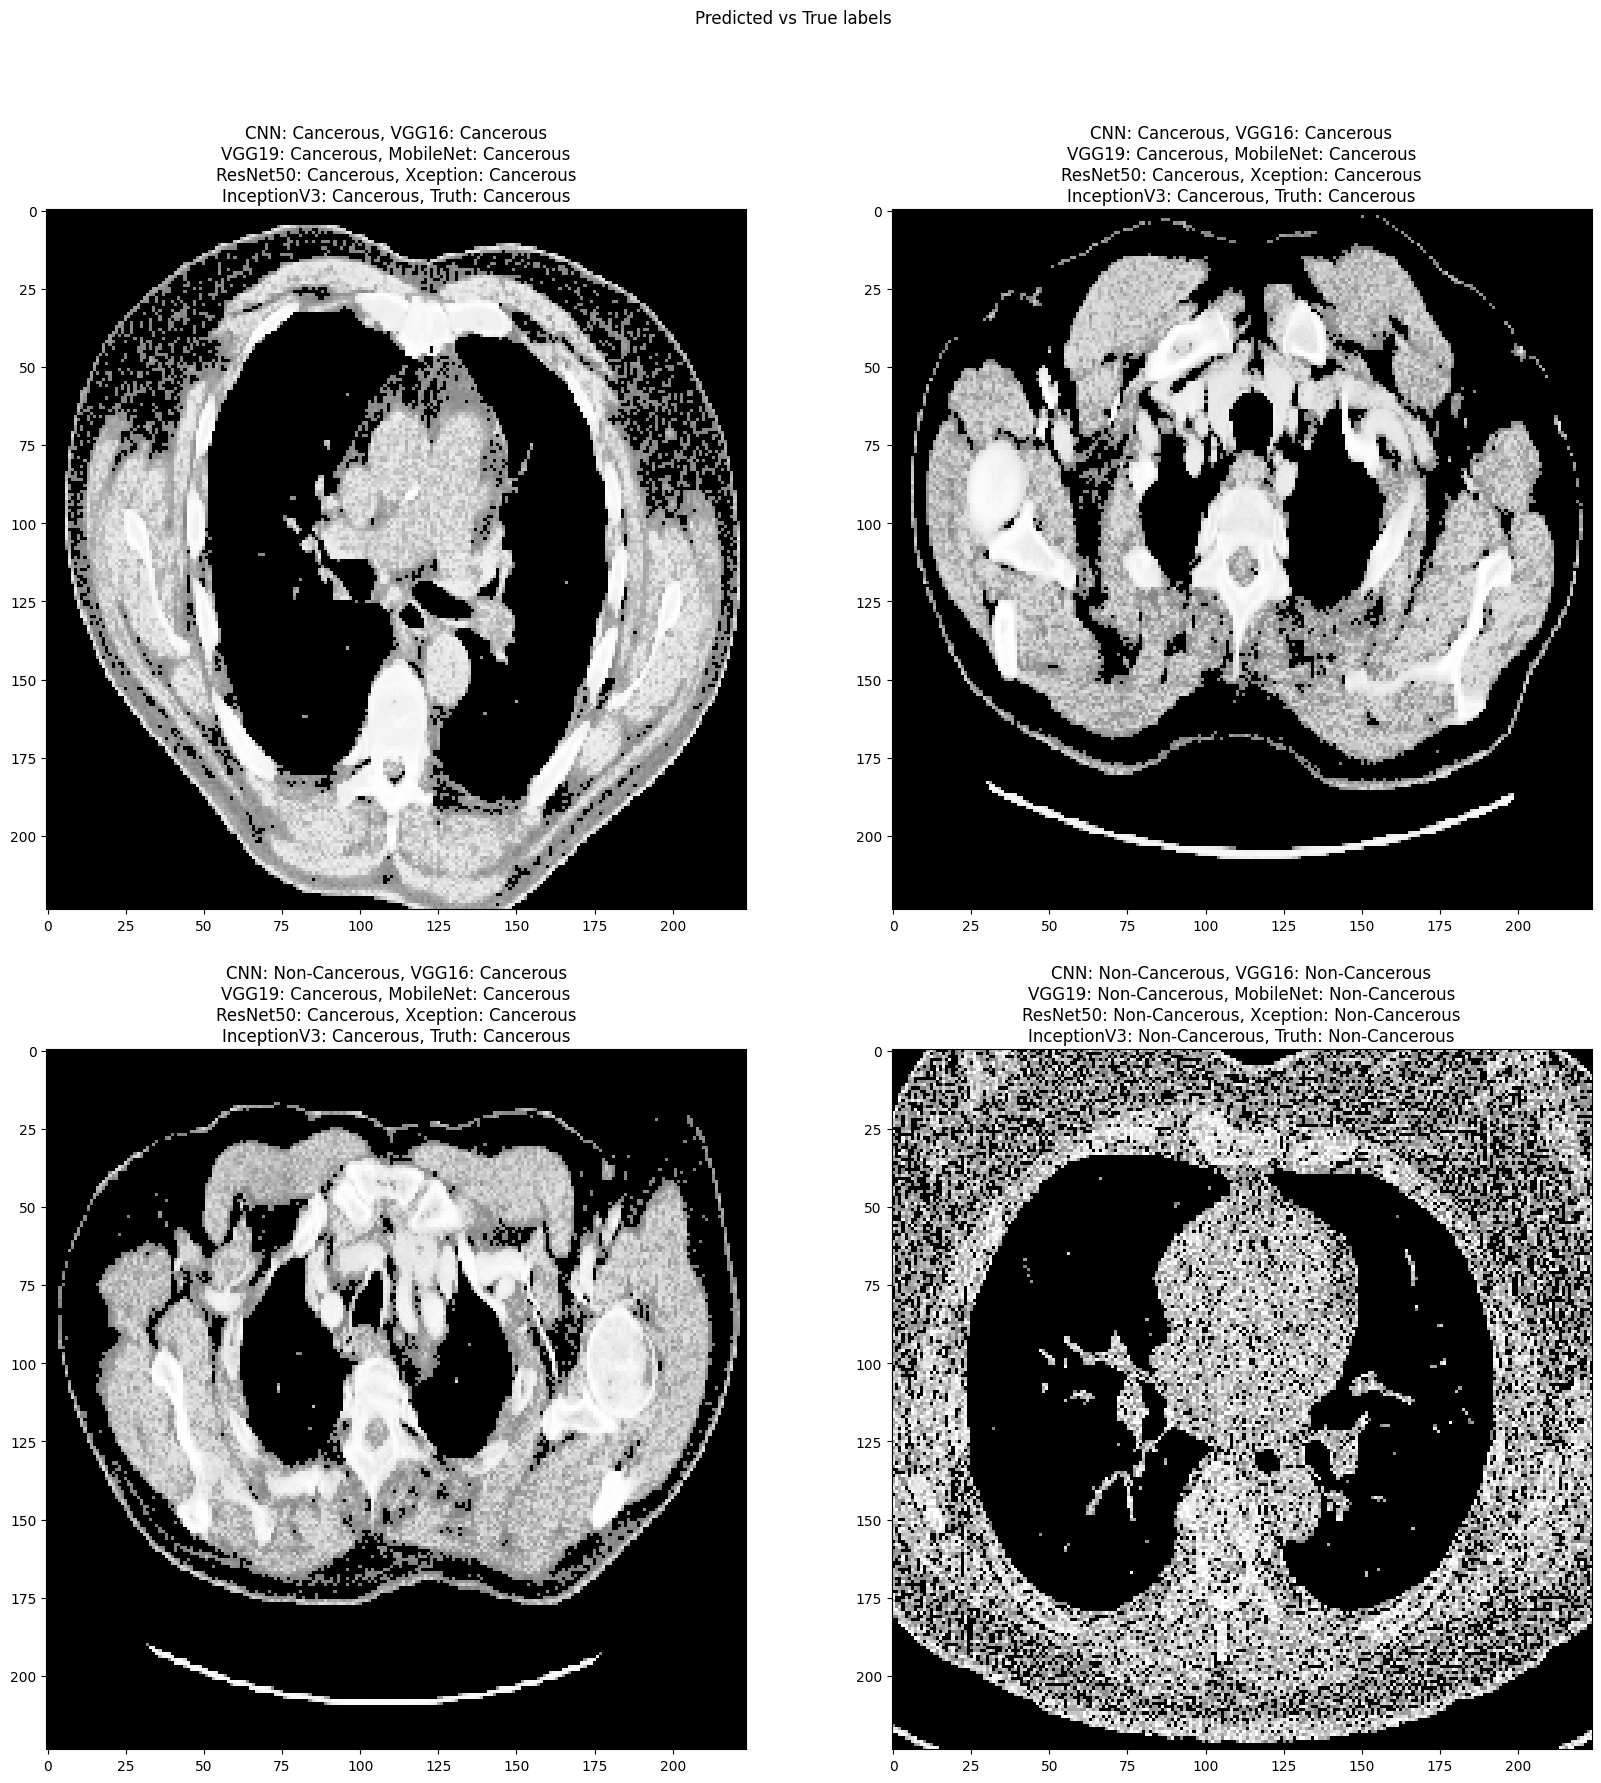

In [55]:
batch = next(test_dataset)

def predAll(batch, i):
  label_dict = {0: 'Cancerous', 1: 'Non-Cancerous'}
  cnnPred = 0 if CNN.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  vgg16Pred = 0 if VGG16.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  mobilenetPred = 0 if MOBILENET.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  vgg19Pred = 0 if VGG19.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  xceptionPred = 0 if Xception.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  inceptionv3Pred = 0 if InceptionV3.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  resnet50Pred = 0 if ResNet50.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1

  return f'CNN: {label_dict[cnnPred]}, VGG16: {label_dict[vgg16Pred]}\nVGG19: {label_dict[vgg19Pred]}, MobileNet: {label_dict[mobilenetPred]}\nResNet50: {label_dict[resnet50Pred]}, Xception: {label_dict[xceptionPred]}\nInceptionV3: {label_dict[inceptionv3Pred]}, Truth: {label_dict[int(batch[1][i])]}'


plt.figure(figsize=(20, 20))

ax1 = plt.subplot(2, 2, 1)
plt.imshow(batch[0][0])
label = predAll(batch, 0)
ax1.set_title(label)


ax2 = plt.subplot(2, 2, 2)
plt.imshow(batch[0][5])
label = predAll(batch, 1)
ax2.set_title(label)

ax3 = plt.subplot(2, 2, 3)
plt.imshow(batch[0][2])
label = predAll(batch, 2)
ax3.set_title(label)

ax4 = plt.subplot(2, 2, 4)
plt.imshow(batch[0][3])
label = predAll(batch, 3)
ax4.set_title(label)


plt.suptitle('Predicted vs True labels')
plt.show()


In [44]:
eval = [CNN_scores, VGG16_scores, VGG19_scores, MOBILENET_scores, ResNet50_scores, Xception_scores, InceptionV3_scores]
eval

[[0.22622434794902802,
  0.905940592288971,
  0.6984127163887024,
  1.0,
  0.9861910939216614,
  0.8002634644508362],
 [0.06368926167488098,
  0.9851484894752502,
  0.936170220375061,
  1.0,
  0.9989930987358093,
  0.9700680375099182],
 [0.07246623933315277,
  0.9801980257034302,
  0.976190447807312,
  0.9318181872367859,
  0.9938147068023682,
  0.9616161584854126],
 [0.02090984769165516,
  0.9950494766235352,
  0.9777777791023254,
  1.0,
  0.9998562335968018,
  0.9904761910438538],
 [0.2072836309671402,
  0.9306930899620056,
  0.7884615659713745,
  0.9318181872367859,
  0.9807968735694885,
  0.8167886734008789],
 [0.026782281696796417,
  0.9950494766235352,
  0.9777777791023254,
  1.0,
  1.0,
  0.8441558480262756],
 [0.0764869824051857,
  0.9851484894752502,
  0.9555555582046509,
  0.9772727489471436,
  0.9956847429275513,
  0.9726190567016602]]

<div style='font-size:100%;'>
    <a id='analysis'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center> Comparative analysis of the models </center>
    </h1>
</div></center>

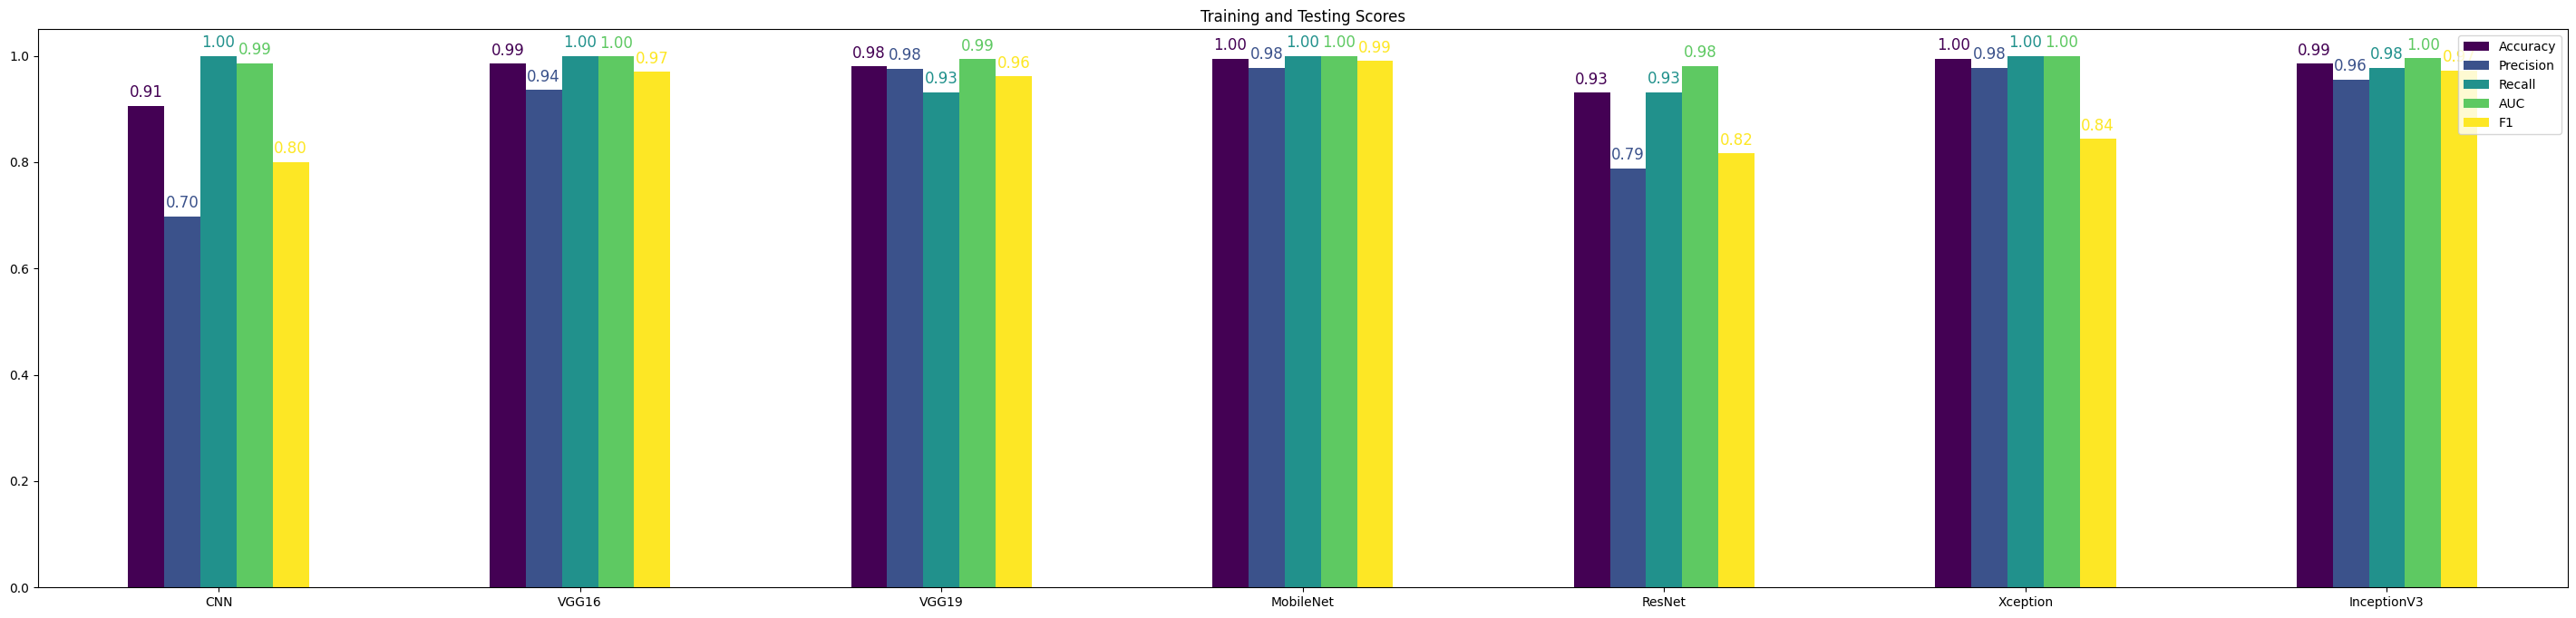

In [54]:
indices = ['CNN', 'VGG16', 'VGG19', 'MobileNet', 'ResNet', 'Xception', 'InceptionV3']
scores = pd.DataFrame({'Accuracy': [item[1] for item in eval],'Precision': [item[2] for item in eval], 'Recall': [item[3] for item in eval], 'AUC': [item[4] for item in eval], 'F1': [item[5] for item in eval]}, index=indices)
plot = scores.plot.bar(figsize=(36, 8), rot=0, cmap='viridis')
plt.title('Training and Testing Scores')
plot.bar_label(plot.containers[0], padding=4, color='#440154', fontsize=12, fmt='%.2f')
plot.bar_label(plot.containers[1], padding=4, color='#3b528b', fontsize=12, fmt='%.2f')
plot.bar_label(plot.containers[2], padding=4, color='#21918c', fontsize=12, fmt='%.2f')
plot.bar_label(plot.containers[3], padding=4, color='#5ec962', fontsize=12, fmt='%.2f')
plot.bar_label(plot.containers[4], padding=4, color='#fde725', fontsize=12, fmt='%.2f')

plt.show()

In [46]:
scores

,Accuracy,Precision,Recall,AUC,F1
CNN,0.905941,0.698413,1.000000,0.986191,0.800263
VGG16,0.985148,0.936170,1.000000,0.998993,0.970068
VGG19,0.980198,0.976190,0.931818,0.993815,0.961616
MobileNet,0.995049,0.977778,1.000000,0.999856,0.990476
ResNet,0.930693,0.788462,0.931818,0.980797,0.816789
Xception,0.995049,0.977778,1.000000,1.000000,0.844156
InceptionV3,0.985148,0.955556,0.977273,0.995685,0.972619


<div style='font-size:100%;'>
    <a id='references'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center> References </center>
    </h1>
</div></center>


1. [1] Tekade, Ruchita, and K. Rajeswari. "Lung cancer detection and classification using deep learning." 2018 Fourth International Conference on Computing Communication Control and Automation (ICCUBEA). IEEE, 2018.
2. [2] Bhatia, Siddharth, Yash Sinha, and Lavika Goel. "Lung cancer detection: a deep learning approach." Soft Computing for Problem Solving. Springer, Singapore, 2019. 699-705.
3. [3] Radhika, P. R., Rakhi AS Nair, and G. Veena. "A comparative study of lung cancer detection using machine learning algorithms." 2019 IEEE International Conference on Electrical, Computer and Communication Technologies (ICECCT). IEEE, 2019.
4. [4] Shakeel, P. Mohamed, Mohd Aboobaider Burhanuddin, and Mohamad Ishak Desa. "Lung cancer detection from CT image using improved profuse clustering and deep learning instantaneously trained neural networks." Measurement 145 (2019): 702-712.
5. [5] Asuntha, A., and Andy Srinivasan. "Deep learning for lung Cancer detection and classification." Multimedia Tools and Applications 79.11 (2020): 7731-7762.
6. [6] Joshua, Eali Stephen Neal, Midhun Chakkravarthy, and Debnath Bhattacharyya. "An Extensive Review on Lung Cancer Detection Using Machine Learning Techniques: A Systematic Study." Rev. d'Intelligence Artif. 34.3 (2020): 351-359.
7. [7] Alsinglawi, Belal, et al. "An explainable machine learning framework for lung cancer hospital length of stay prediction." Scientific reports 12.1 (2022): 1-10.
8. [8] Yan, Sha, et al. "Computed Tomography Images under Deep Learning Algorithm in the Diagnosis of Perioperative Rehabilitation Nursing for Patients with Lung Cancer." Scientific Programming 2022 (2022).
9. [9] Elnakib, Ahmed, Hanan M. Amer, and Fatma EZ Abou-Chadi. "Early lung cancer detection using deep learning optimization." (2020): 82-94.
10. [10] Shimazaki, Akitoshi, et al. "Deep learning-based algorithm for lung cancer detection on chest radiographs using the segmentation method." Scientific reports 12.1 (2022): 1-10.
11. [11] Hosseini, Hesamoddin, Reza Monsefi, and Shabnam Shadroo. "Deep Learning Applications for Lung Cancer Diagnosis: A systematic review." arXiv preprint arXiv:2201.00227 (2022).
12. [12] Li, Wenzhe, et al. "Machine Learning-Assisted Dual-Marker Detection in Serum Small Extracellular Vesicles for the Diagnosis and Prognosis Prediction of Non-Small Cell Lung Cancer." Nanomaterials 12.5 (2022): 809.